# Introduction

# Data Exploration

Import dependencies

In [1]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data source: https://www.kaggle.com/andieminogue/newspaper-churn
df_og = pd.read_excel("newspaper-churn/NewspaperChurn new version.xlsx", sheet_name=None)
df_og = df_og['Sheet1']

In [4]:
df_og.head()

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,180590686,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,1 3RD PL UNIT 703,CA,LONG BEACH,LOS ANGELES,90802,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,181401653,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,1 AVIGNON,CA,NEWPORT COAST,ORANGE,92657,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,180374685,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,1 BLACKSWAN,CA,IRVINE,ORANGE,92604,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
3,180703483,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,1 BLUE HORIZON,CA,LAGUNA NIGUEL,ORANGE,92677,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
4,180358906,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,1 BRISA DEL LAGO,CA,RANCHO SANTA MARGARITA,ORANGE,92688,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES


In [5]:
print(df_og.shape)
df_og.columns

(15855, 19)


Index(['SubscriptionID', 'HH Income', 'Home Ownership', 'Ethnicity',
       'dummy for Children', 'Year Of Residence', 'Age range', 'Language',
       'Address', 'State', 'City', 'County', 'Zip Code', 'weekly fee',
       'Deliveryperiod', 'Nielsen Prizm', 'reward program', 'Source Channel',
       'Subscriber'],
      dtype='object')

## Description of columns
`SubscriptionID` - The unique ID given to each newspaper subscription

`HH Income` - The household income for the subscriber

`Home Ownership` - Home ownership status, either renter or owner

`Ethnicity` - Ethinicity of subscriber

`dummy for Children` - Whether subscribers have children

`Year of Residence` - Number of years subscribers have resident as their home

`Age range` - Age range of household

`Language` - Language spoken by subscriber household

`Address`, `State`, `City`, `County`, `Zip Code` - Information about location of subscriber

`Weekly fee` - Fee paid for subscription

`Deliveryperiod` - Period in a week where deliveries are done

`Nielsen Prizm` - Geo-demographic segmentation of households

`reward program` - Number of rewards used

`Source Channel` - Recruitment source channel

`Subscriber` - Subscriber or not


In [6]:
df_og.describe()

,SubscriptionID,Year Of Residence,Zip Code,reward program
count,1.585500e+04,15855.000000,15855.000000,15855.000000
mean,1.643729e+08,13.546137,92424.541911,1.100662
std,2.356755e+07,11.770368,733.648427,9.555332
min,1.100011e+08,1.000000,90603.000000,0.000000
25%,1.501824e+08,4.000000,92627.000000,0.000000
50%,1.803333e+08,10.000000,92688.000000,0.000000
75%,1.806362e+08,21.000000,92806.000000,0.000000
max,1.815541e+08,56.000000,92887.000000,353.000000


There might be significant outliers observed for the 2 ordinal numeric features `Year of Residence` and `reward program`.

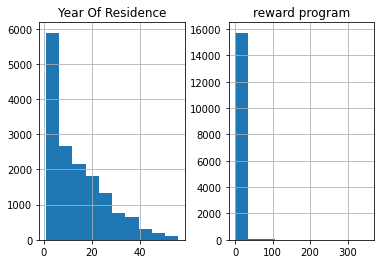

In [7]:
def pltHist(df):
    df_og[['Year Of Residence','reward program']].hist()

pltHist(df_og)

The `Year of Residence` column is left skewed, transformation can be done on it to make it more normal, the `reward program` is very sparse, removing it or transforming it may be necessary.

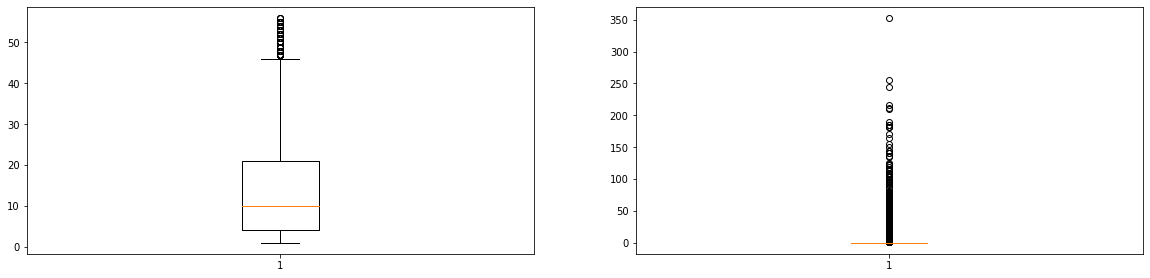

In [8]:
plt.rcParams["figure.figsize"] = (20, 10)

def pltBox(df):
    plt.subplot(221)
    plt.boxplot(df_og['Year Of Residence'])
    plt.subplot(222)
    plt.boxplot(df_og['reward program'])

pltBox(df_og)

There are some outliers in the `Year of Residence` feature. Since `reward program` is sparse, the large number of outliers is expected. Let's see if we should transform `Year Of Residence`.

{'whiskers': [<matplotlib.lines.Line2D at 0x20d006af160>,
 'caps': [<matplotlib.lines.Line2D at 0x20d006af880>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d006a1d90>],
 'medians': [<matplotlib.lines.Line2D at 0x20d006affa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d006ba370>],
 'means': []}

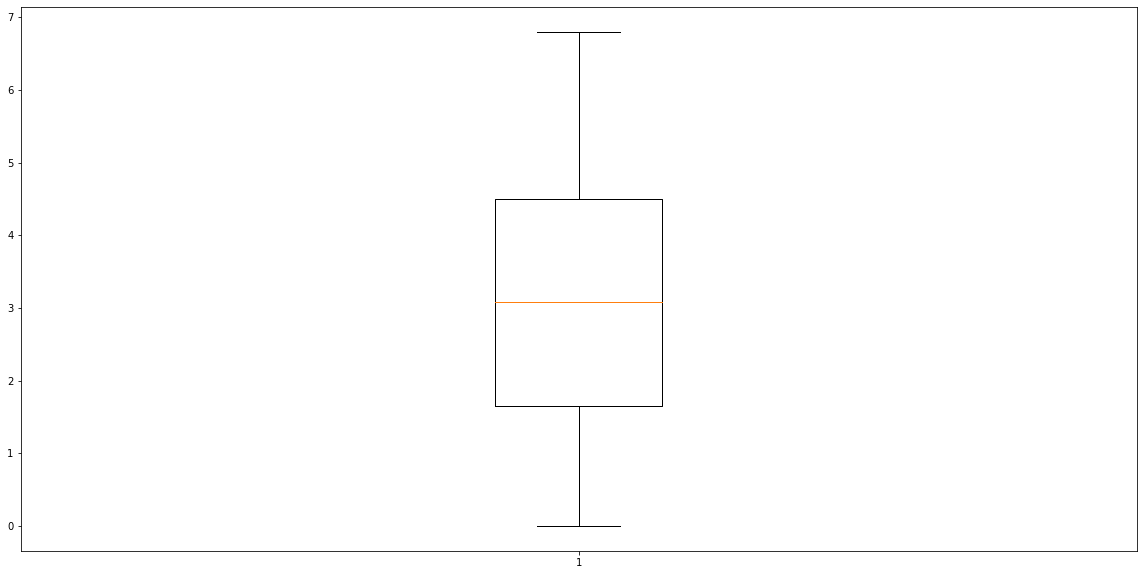

In [9]:
from scipy import stats
boxcox_yor = stats.boxcox(df_og['Year Of Residence'])[0]
plt.boxplot(boxcox_yor)

We will transform it during the transformation stage later.

Let's explore the categorical variables

In [10]:
df_og.dtypes

SubscriptionID         int64
HH Income             object
Home Ownership        object
Ethnicity             object
dummy for Children    object
Year Of Residence      int64
Age range             object
Language              object
Address               object
State                 object
City                  object
County                object
Zip Code               int64
weekly fee            object
Deliveryperiod        object
Nielsen Prizm         object
reward program         int64
Source Channel        object
Subscriber            object
dtype: object

In [11]:
df_og.head()

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,180590686,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,1 3RD PL UNIT 703,CA,LONG BEACH,LOS ANGELES,90802,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,181401653,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,1 AVIGNON,CA,NEWPORT COAST,ORANGE,92657,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,180374685,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,1 BLACKSWAN,CA,IRVINE,ORANGE,92604,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
3,180703483,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,1 BLUE HORIZON,CA,LAGUNA NIGUEL,ORANGE,92677,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
4,180358906,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,1 BRISA DEL LAGO,CA,RANCHO SANTA MARGARITA,ORANGE,92688,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES


In [12]:
category = df_og.select_dtypes(exclude=['int64']).columns.tolist()
for i in category:
    df_og[i].value_counts()

The `subscriptionID`, `address`, `state`, `Zip Code` and `city` columns can be removed since their cardinality is either too high, is one, or the information provided is not useful. Other than the binary features, the `HH Income`, `Age range`, `weekly fee` features can be label encoded since they are ordinal. The `County`, `Deliveryperiod`, `Ethnicity`, `Language`, `Nielsen Prizm` and `Source Channel` features can be one-hot encoded. 

In [13]:
df_og2 = df_og.drop(['Address','State','City','SubscriptionID','Zip Code'], axis = 1)
df_og2

,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,County,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,LOS ANGELES,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,ORANGE,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,ORANGE,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
3,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,ORANGE,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
4,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,ORANGE,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15850,"$ 80,000 - $89,999",OWNER,Italian,N,3,25-29,English,ORANGE,$0.01 - $0.50,SunOnly,MW,0,Partner,NO
15851,"$ 80,000 - $89,999",OWNER,Italian,N,3,25-29,English,ORANGE,$0 - $0.01,SunOnly,MW,0,Partner,NO
15852,"$150,000 - $174,999",OWNER,Irish,Y,12,60-64,English,ORANGE,$1.00 - $1.99,7Day,MW,0,DirectMl,NO
15853,"$ 80,000 - $89,999",OWNER,Hispanic,Y,30,NaN,English,RIVERSIDE,$0 - $0.01,SunOnly,FE,0,Partner,NO


Before doing data transformations, let's deal with missing data.

In [14]:
df_og2.isnull().sum()

HH Income                0
Home Ownership           0
Ethnicity                0
dummy for Children       0
Year Of Residence        0
Age range              108
Language              1007
County                   0
weekly fee             186
Deliveryperiod           0
Nielsen Prizm          129
reward program           0
Source Channel           0
Subscriber               0
dtype: int64

Let's see if dropping some of these rows will affect the class distribution for our target `Subscriber`

In [15]:
df_og2.Subscriber.value_counts()

NO     12818
YES     3037
Name: Subscriber, dtype: int64

In [16]:
df_og2.dropna().Subscriber.value_counts()
df_og2 = df_og2.dropna()
df_og2.reset_index(drop=True, inplace=True)
df_og2.head()

,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,County,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,LOS ANGELES,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,ORANGE,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,ORANGE,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
3,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,ORANGE,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES
4,"$500,000 Plus",OWNER,Scottish (Scotch),Y,10,45-49,English,ORANGE,$0 - $0.01,SunOnly,FW,0,Partner,NO


We drop `NaN` rows since it actually improves the class distribution. We can now ready our data for training.

# Part A – Shortlist promising models

We will undersample the majority class to make the data even since there is sufficient data.

We used `StandardScaler` after all other transformation to ensure label encoded features aren't more weighted during training. It is used over `MinMaxScaler` due to outliers in the `reward program` feature.

Both undersampling and scaling are done for each fold to ensure no data leakage occurs.

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder

X = df_og2.drop(['Subscriber'], axis=1)
y = df_og2[['Subscriber']]
y = OrdinalEncoder().fit_transform(y)
X, y = RandomUnderSampler().fit_resample(X,y)

In [18]:
numeric = df_og2.select_dtypes(include=['int64']).columns.tolist()
onehot_cat = df_og2.select_dtypes(exclude=['int64']).columns.tolist()
onehot_cat.remove('Subscriber')

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import ordinal
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import keras
from matplotlib import pyplot as plt

def getScores(X, model,show_pred_plot=True, show_feature_importance=True):
    encode_pipeline = ColumnTransformer([
            ('onehot_cat', OneHotEncoder(handle_unknown='ignore'), onehot_cat),
    ], remainder = 'passthrough', sparse_threshold = 0)
    
    full_pipeline = Pipeline([
            ('encode',encode_pipeline),
            ('scale', StandardScaler()),
            ('model', model)
    ])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scoring = {'acc': 'accuracy',
               'f1': 'f1',
               'prec': 'precision',
               'rec': 'recall'}
    scores = cross_validate(full_pipeline, X, y, scoring=scoring , verbose=100, cv=cv, n_jobs=-1, return_train_score=True)
   
    #for plotting
    plt.plot(scores['train_acc'])
    plt.plot(scores['test_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Mean Accuracy')
    plt.xlabel(' Repeats for k-Fold Cross-Validation')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    
    #put code here
    #change print score to print a one row table    
    print(type(model).__name__)

    print(scores)
    
    print("metric - mean - std")
    for i in scores.keys():
        print("{}: {:.3f} , {:.3f}".format(i, np.mean(scores[i]), np.std(scores[i])))
    #use permutation_importance to get feature importance due to presence of onehot encoded features
    if show_feature_importance:
        full_pipeline.fit(X,y)
        result = permutation_importance(full_pipeline, X, y, n_repeats=10,
                                    random_state=42, n_jobs=-1)
        sorted_idx = result.importances_mean.argsort()
        index = X.columns.tolist()

        fig, ax = plt.subplots()
        ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X.columns[sorted_idx])
        ax.set_title("Permutation Importances (test set)")
        fig.tight_layout()
        plt.show()
    return scores

## Logistic Regression

Note: There will be differences in the top 3 most important features whenever the model is run due to randomness and variance. However, the significant features should still be consistent across different runs.

In [20]:
scores_1 = dict()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.5s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    3.2s remaining:    4.2s
[Pa

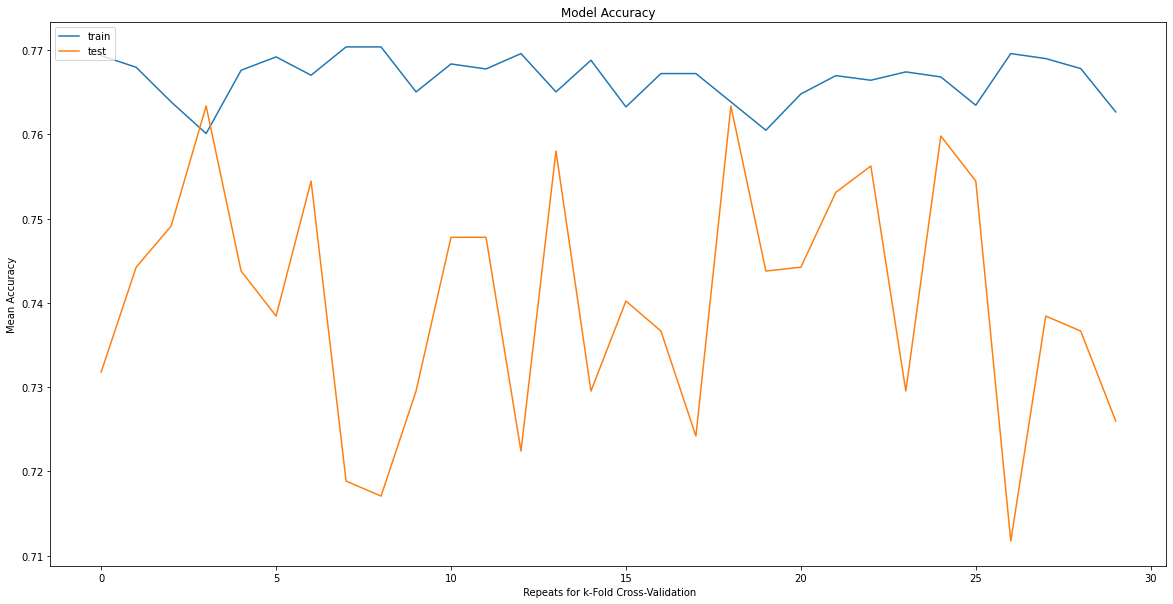

LogisticRegression
{'fit_time': array([0.62899327, 0.67499852, 0.59399748, 0.72403693, 0.7790308 ,
       0.69703412, 0.68303394, 0.63403559, 0.74503422, 0.7490356 ,
       0.70604277, 0.69703555, 0.76899838, 0.62700081, 0.71199942,
       0.70000291, 0.76500034, 0.70000172, 0.70799947, 0.76000023,
       0.72599745, 0.76899767, 0.76600242, 0.76900101, 0.50200057,
       0.39799881, 0.3979969 , 0.37399864, 0.4260428 , 0.40099502]), 'score_time': array([0.02000237, 0.02303457, 0.01999998, 0.01500368, 0.01500249,
       0.01800108, 0.01600122, 0.01699901, 0.01699805, 0.01700282,
       0.01599193, 0.01600313, 0.01899862, 0.02000093, 0.0200007 ,
       0.01999736, 0.01900172, 0.01699853, 0.01800036, 0.01400304,
       0.02000308, 0.01800299, 0.01700091, 0.0159986 , 0.0100019 ,
       0.00899768, 0.01000023, 0.0090003 , 0.00699878, 0.01104593]), 'test_acc': array([0.73179396, 0.74422735, 0.74911032, 0.7633452 , 0.74377224,
       0.73843416, 0.7544484 , 0.71886121, 0.71708185, 0.72953737,


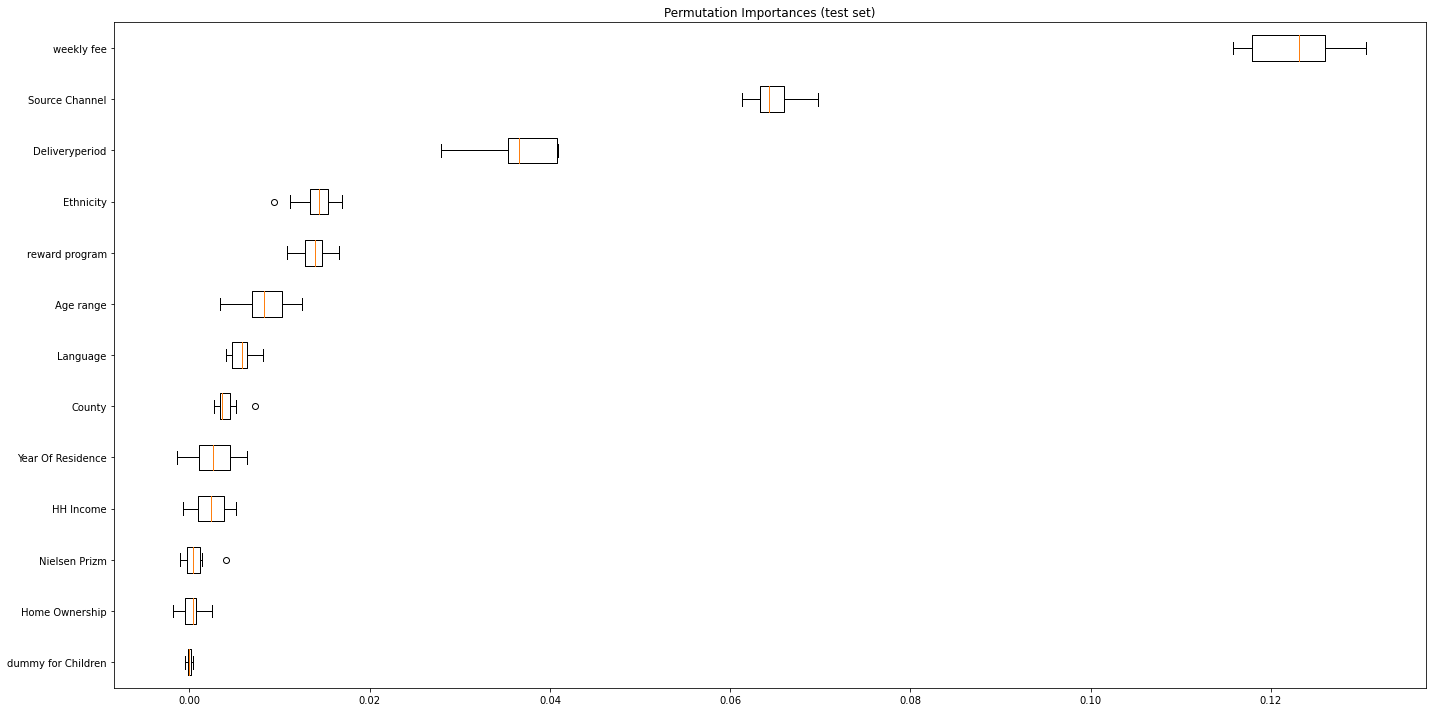

In [21]:
from sklearn.linear_model import LogisticRegression

scores_1['lr'] = getScores(X, LogisticRegression())

The 3 most important features for Logistic Regression are `Source Channel`, `Deliveryperiod` and `weekly fee`. The `Source Channel` and `weekly fee` far outstrip the other features in terms of importance with `dummy for Children` having the least importance.

The accuracy, f1 score, recall and precision are all around ~0.75 which is a good sign. There are all as expected for the accuracy obtained. There is slight overfitting as the train metrics are slightly higher than the test metrics.

The training time is decent.

## Bernoulli Naive Bayes

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.1s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.3s remaining:    3.0s
[Pa

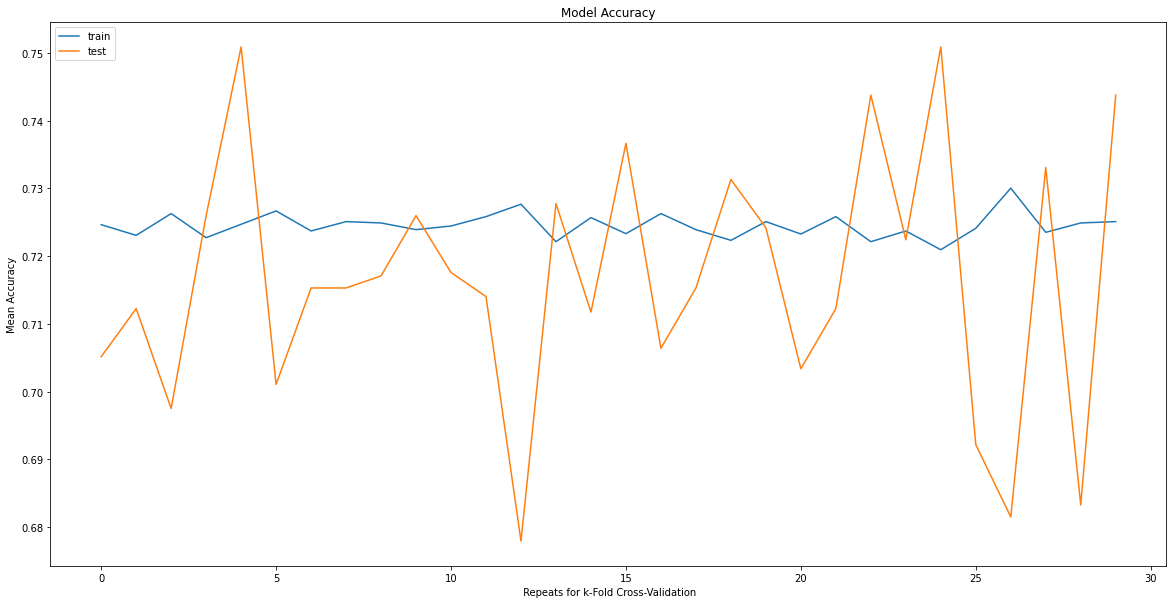

BernoulliNB
{'fit_time': array([0.13300443, 0.13899899, 0.1709981 , 0.1489985 , 0.14999557,
       0.1500001 , 0.14599371, 0.2109983 , 0.2039988 , 0.16099834,
       0.19499516, 0.17699599, 0.16200209, 0.13799953, 0.1419971 ,
       0.13800097, 0.14899921, 0.20051813, 0.19952297, 0.18551445,
       0.21751595, 0.18152142, 0.15751815, 0.17651987, 0.16551757,
       0.12999988, 0.18199778, 0.16599703, 0.16200113, 0.10799766]), 'score_time': array([0.01799536, 0.01700044, 0.0450027 , 0.02100158, 0.0210011 ,
       0.01799655, 0.01899886, 0.01900172, 0.02399755, 0.01900029,
       0.01600051, 0.01800179, 0.01899695, 0.0180037 , 0.01999807,
       0.02199864, 0.01800156, 0.01800418, 0.01899743, 0.01700211,
       0.01899815, 0.0199945 , 0.01800036, 0.02100229, 0.01800203,
       0.00999951, 0.01700234, 0.01200032, 0.00999975, 0.01100016]), 'test_acc': array([0.70515098, 0.71225577, 0.6975089 , 0.72597865, 0.75088968,
       0.70106762, 0.71530249, 0.71530249, 0.71708185, 0.72597865,
       

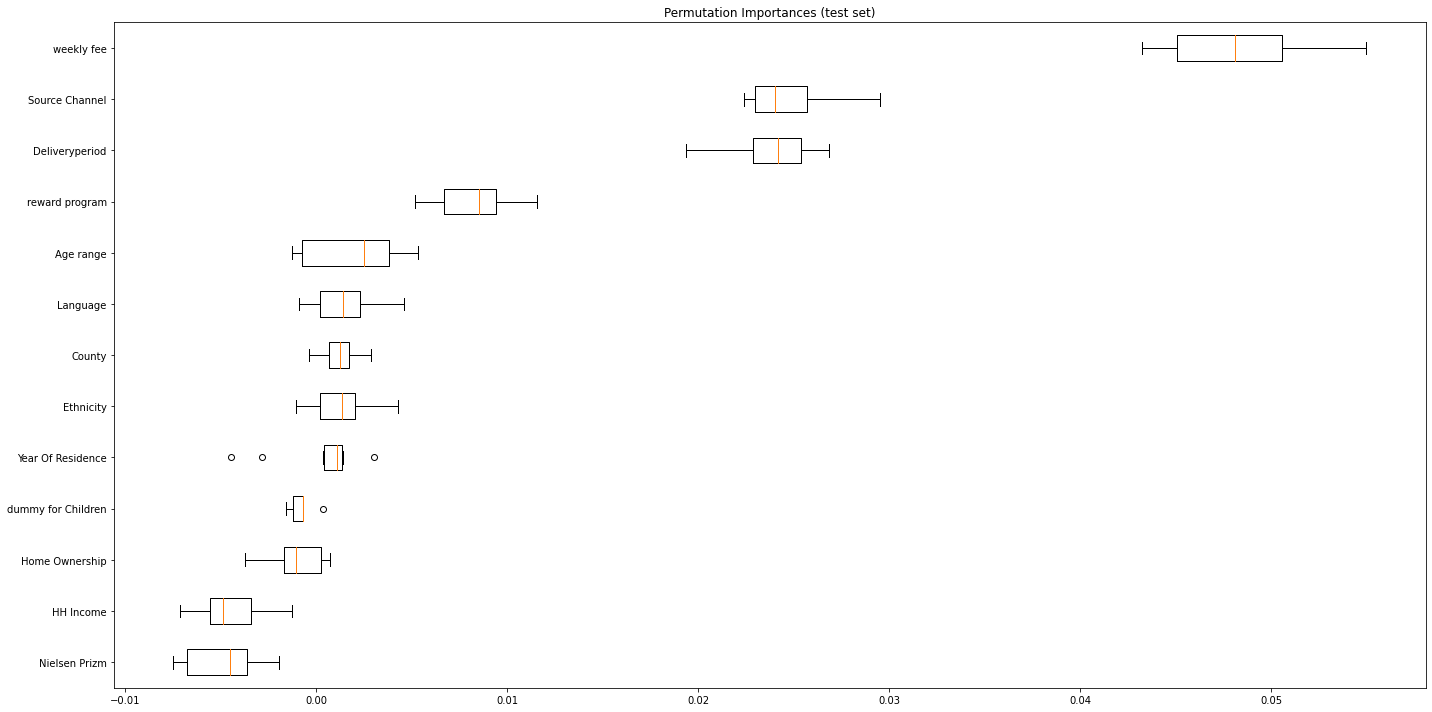

In [22]:
from sklearn.naive_bayes import BernoulliNB

scores_1['bnb'] = getScores(X, BernoulliNB())

The top 3 most important features for Bernoulli Naive Bayes are `Source Channel`, `Deliveryperiod` and `weekly fee`. There are much larger variances in the importance of the features in different runs of the cross validation.

The performance is slightly worse than the logistic regression with nothing notable about the metric scores.

The training time is very fast since it is made to handle many features.

## Gaussian Naive Bayes

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.6s remaining:    3.4s
[Pa

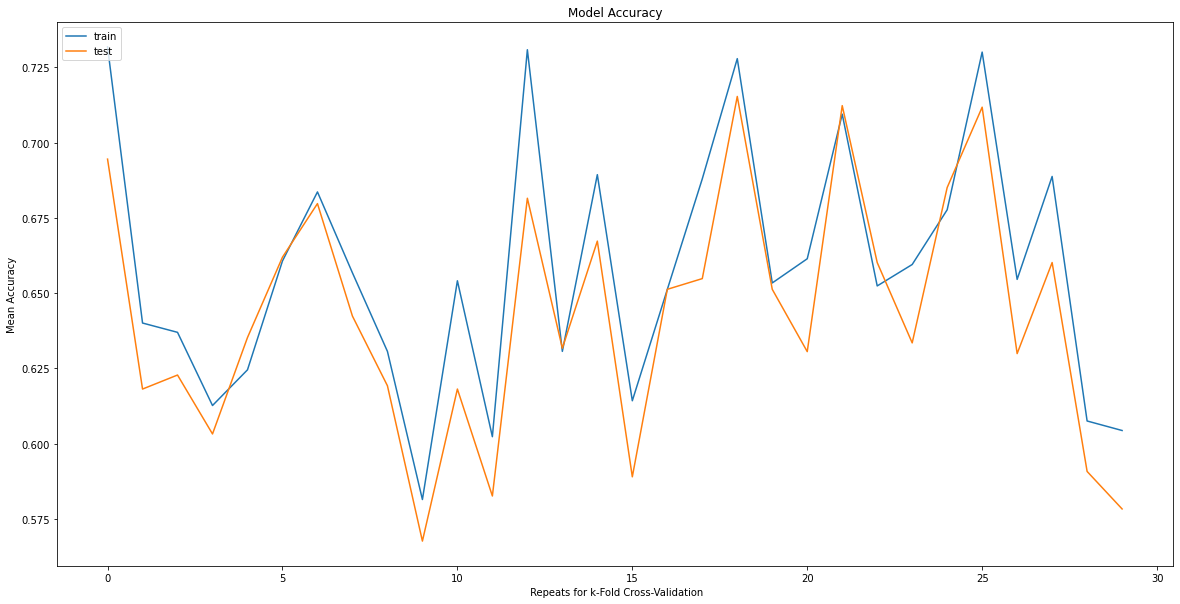

GaussianNB
{'fit_time': array([0.11600184, 0.21299815, 0.19799876, 0.23400331, 0.22099781,
       0.20299864, 0.23399711, 0.21799731, 0.21000051, 0.25299859,
       0.21999741, 0.20800114, 0.18300152, 0.21399665, 0.24399495,
       0.24299598, 0.23899865, 0.2299962 , 0.22799969, 0.21600223,
       0.22200012, 0.21500325, 0.21399951, 0.229002  , 0.22699833,
       0.17399621, 0.1529963 , 0.16499543, 0.15399933, 0.15999699]), 'score_time': array([0.02499676, 0.02199912, 0.02500129, 0.02099538, 0.02100205,
       0.02500129, 0.02700257, 0.02000451, 0.02199841, 0.01900792,
       0.04700303, 0.03799939, 0.02900028, 0.02199864, 0.02200484,
       0.02399993, 0.0250001 , 0.02300262, 0.02499795, 0.02399993,
       0.02900076, 0.02699947, 0.02500081, 0.02199864, 0.01999927,
       0.01800108, 0.01800013, 0.0170002 , 0.01700044, 0.01199937]), 'test_acc': array([0.69449378, 0.61811723, 0.6227758 , 0.60320285, 0.63523132,
       0.66192171, 0.6797153 , 0.64234875, 0.61921708, 0.56761566,
       0

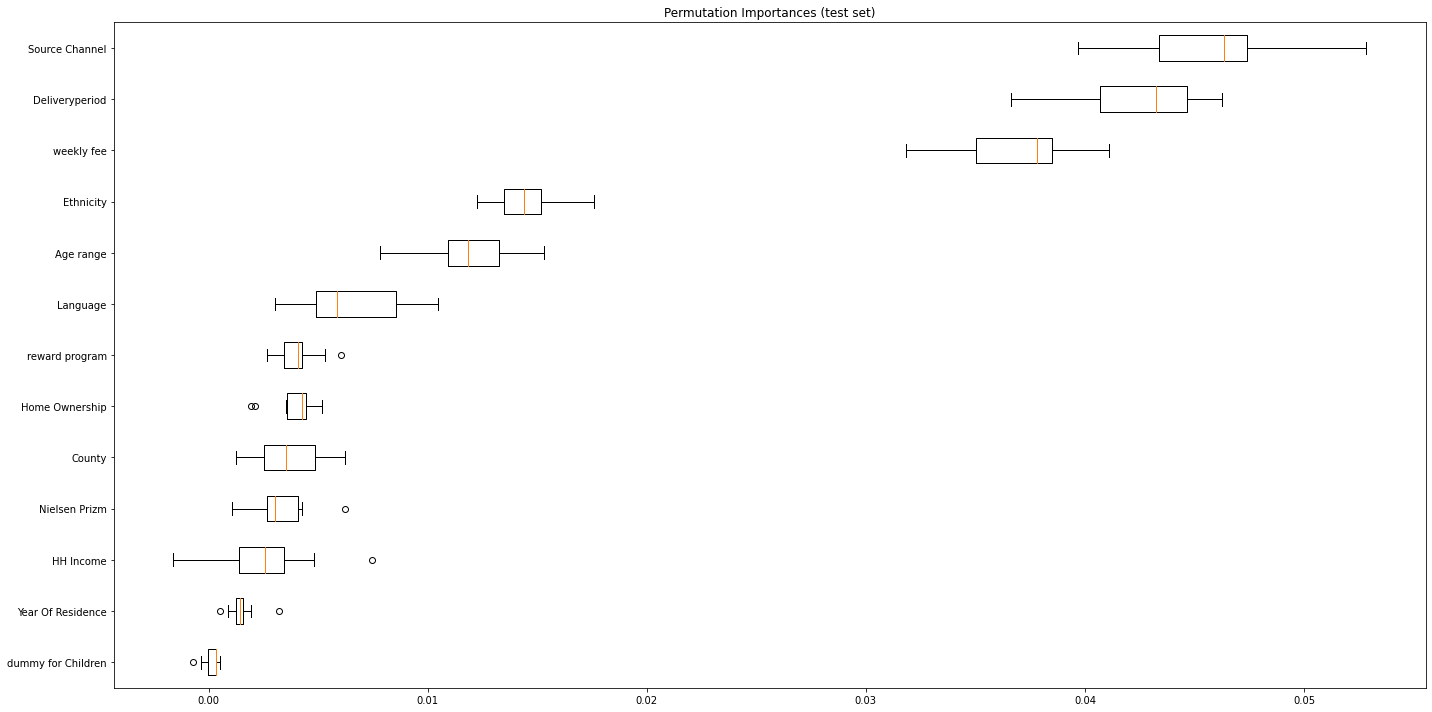

In [23]:
from sklearn.naive_bayes import GaussianNB

scores_1['gnb'] = getScores(X, GaussianNB())

The 3 most important features for Gaussian Naive Bayes are `Deliveryperiod`, `Source Channel` and `Ethnicity`. The influence of `Deliveryperiod` far outstrip the other features and many features have barely any influence.

The accuracy for this model is quite poor at ~0.58, its notable that the recall is very high at ~0.9 indicating a bias towards labeling `YES`. This is not surprising since this model is designed to handle continuous features. The poor performance indicates the features are not normally distributed.

The training time is similar to the BernoulliNB.

## Decision Tree

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.2s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.5s remaining:    3.4s
[Pa

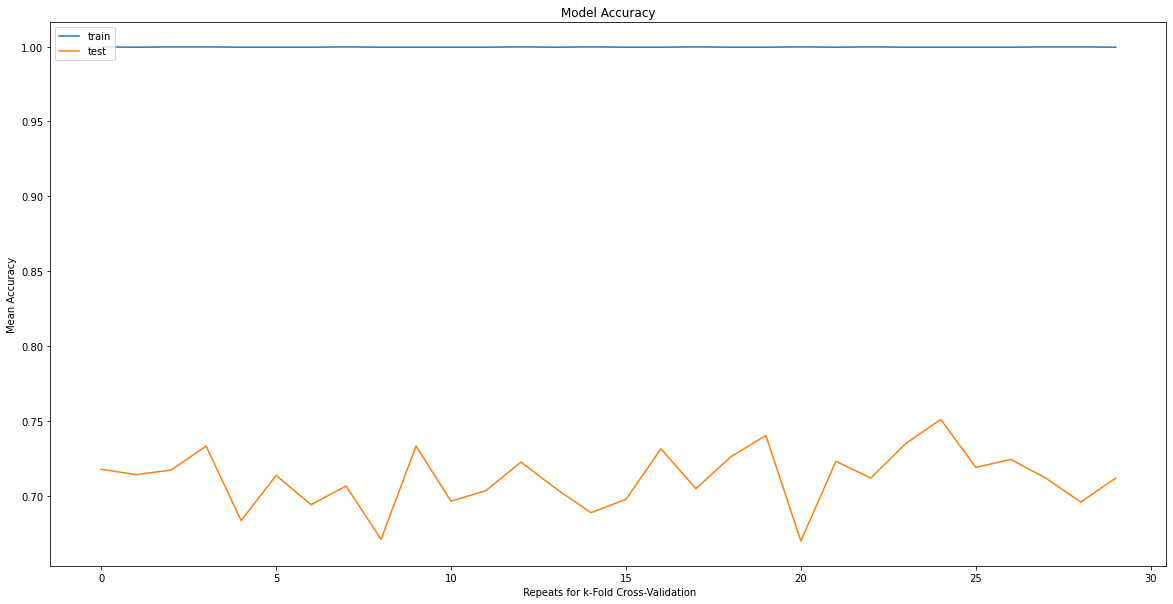

DecisionTreeClassifier
{'fit_time': array([0.37499523, 0.40299892, 0.37399626, 0.37899542, 0.37999868,
       0.37999749, 0.37099385, 0.37899756, 0.3719995 , 0.38100028,
       0.38000274, 0.36800098, 0.34100556, 0.35800219, 0.3769989 ,
       0.36299467, 0.37499928, 0.36999846, 0.36699939, 0.37100124,
       0.37199378, 0.37499738, 0.36600041, 0.36399817, 0.24900103,
       0.20200014, 0.19399476, 0.1709981 , 0.14799714, 0.16299438]), 'score_time': array([0.01200199, 0.01300383, 0.01300001, 0.01400018, 0.01199937,
       0.01200056, 0.01100183, 0.01500034, 0.01500058, 0.01400018,
       0.01400995, 0.0170033 , 0.01399803, 0.01299477, 0.01200008,
       0.01199913, 0.01400518, 0.01300406, 0.01400161, 0.01500034,
       0.01300097, 0.0130012 , 0.01399994, 0.01600194, 0.01199985,
       0.00799894, 0.00799942, 0.00800014, 0.00800014, 0.0079999 ]), 'test_acc': array([0.71758437, 0.71403197, 0.71708185, 0.73309609, 0.68327402,
       0.71352313, 0.69395018, 0.70640569, 0.67081851, 0.733096

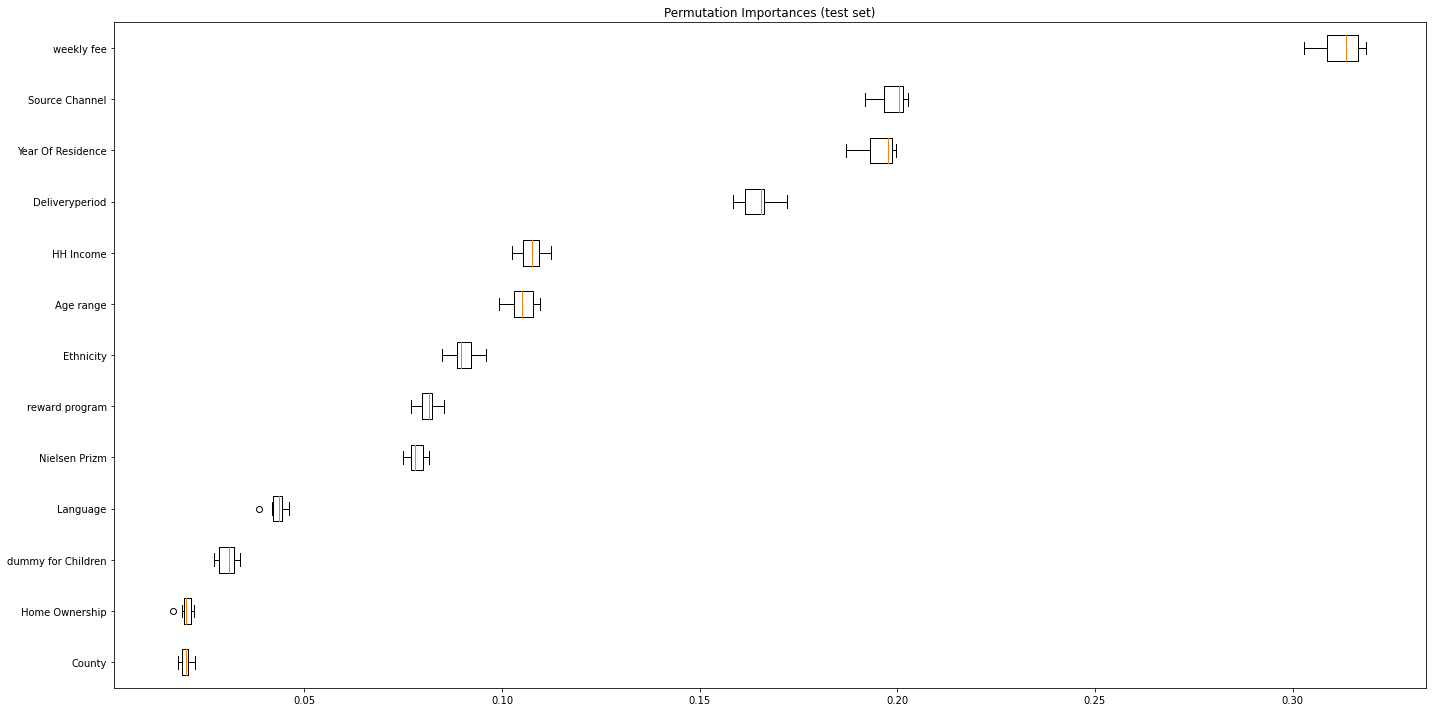

In [24]:
from sklearn.tree import DecisionTreeClassifier

scores_1['dt'] = getScores(X, DecisionTreeClassifier())

The 3 most important features for Decision Tree are `weekly fee`,  `Year of Residence` and `Source Channel`. `weekly fee` is by far the most important feature. The least important is `Home Ownership`.

The test metrics are very similar to logistics regression. However, there is overfitting due to the almost perfect training metrics.

The training time is fast.

## Stochastic Gradient Descent

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.8s remaining:    3.6s
[Pa

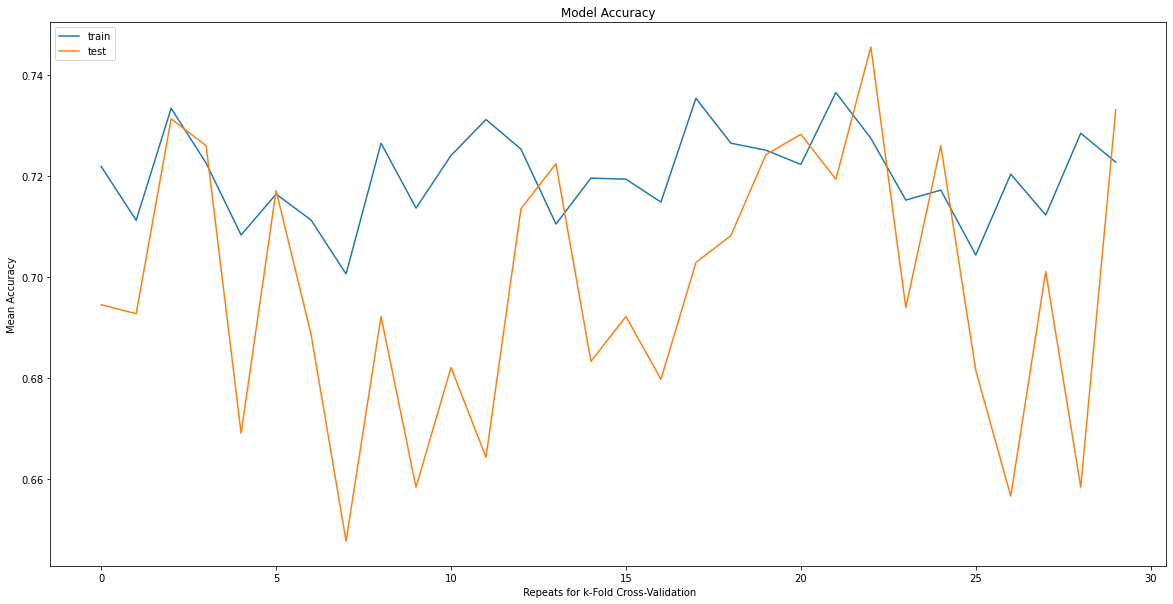

SGDClassifier
{'fit_time': array([0.50499392, 0.39699554, 0.62499762, 0.69299841, 0.63799953,
       0.51499677, 0.66599727, 0.50699782, 0.61000061, 0.61299801,
       0.54299951, 0.67900157, 0.697999  , 0.42999864, 0.58899736,
       0.53399372, 0.52199674, 0.65699768, 0.51599765, 0.57199907,
       0.56199861, 0.60699773, 0.61200142, 0.66399884, 0.46199918,
       0.44300175, 0.42200112, 0.42000294, 0.32900214, 0.36200047]), 'score_time': array([0.0120008 , 0.01100063, 0.01100183, 0.01500154, 0.01400375,
       0.01200151, 0.01600504, 0.01200008, 0.01399708, 0.01300144,
       0.01300001, 0.01299953, 0.0090003 , 0.00999999, 0.01199913,
       0.01000094, 0.00999951, 0.01300001, 0.01300049, 0.01100278,
       0.01200128, 0.01200104, 0.01099968, 0.01000047, 0.00800109,
       0.00700212, 0.00700164, 0.00699806, 0.00800109, 0.00699997]), 'test_acc': array([0.69449378, 0.69271758, 0.73131673, 0.72597865, 0.66903915,
       0.71708185, 0.6886121 , 0.64768683, 0.69217082, 0.65836299,
     

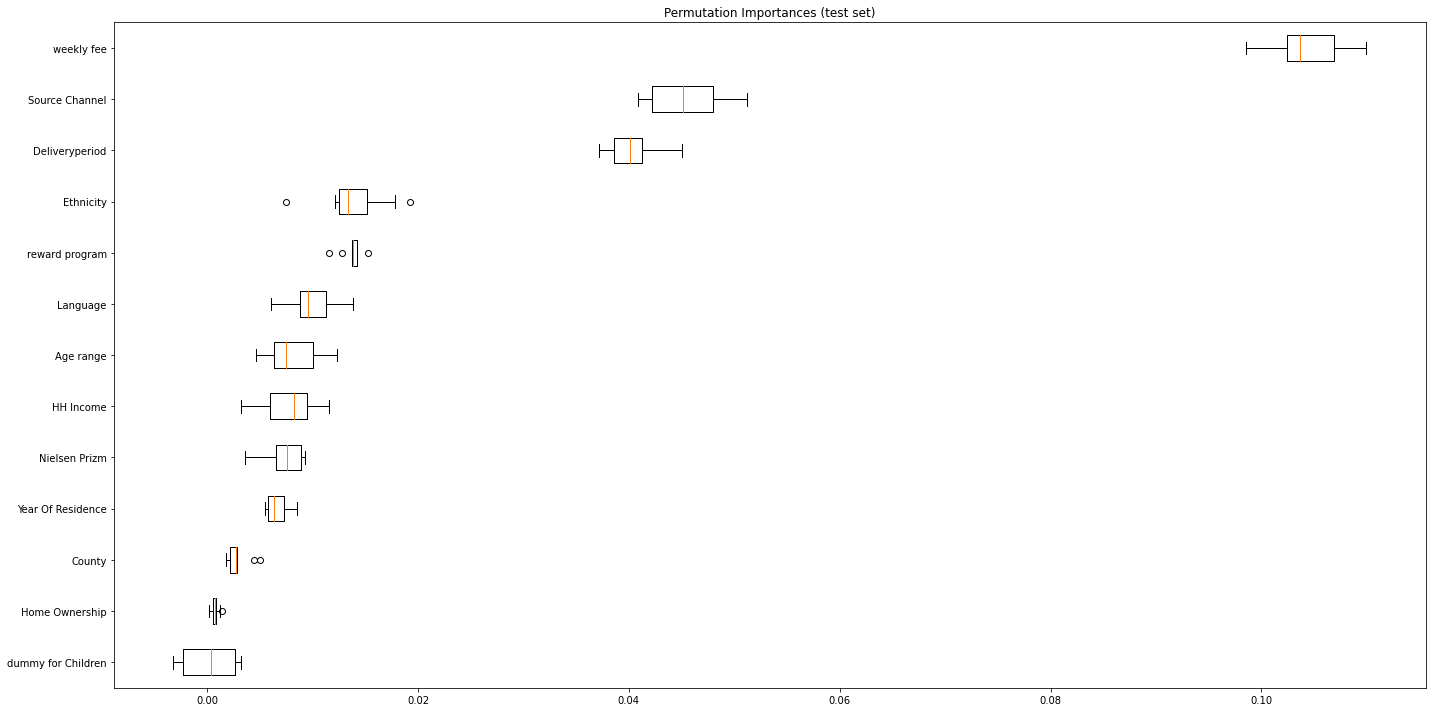

In [25]:
from sklearn.linear_model import SGDClassifier

scores_1['sgd'] = getScores(X, SGDClassifier())

The 3 most important features for SGD are `Source Channel`, `Deliveryperiod` and `weekly fee`.

The metrics for this model are decent.

The training time is decent.

## Random Forest

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    3.6s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    3.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    3.6s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    3.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    5.5s remaining:    7.2s
[Pa

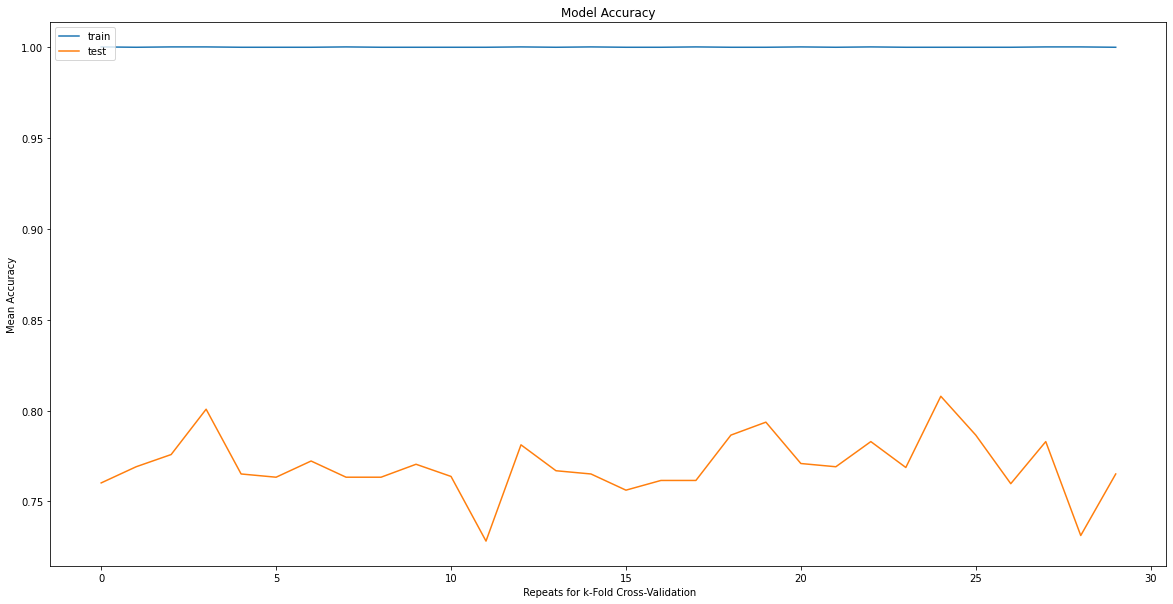

RandomForestClassifier
{'fit_time': array([1.53352976, 1.4905293 , 1.51852751, 1.50352764, 1.53652787,
       1.49753046, 1.55352712, 1.53952551, 1.55152893, 1.52252531,
       1.55352521, 1.49853158, 1.58853555, 1.54153132, 1.59752941,
       1.57753301, 1.56153011, 1.60153365, 1.58553219, 1.56553054,
       1.58053136, 1.60452747, 1.5595243 , 1.55852675, 0.92401576,
       0.91601872, 0.90002322, 0.94601655, 0.85001826, 0.79402113]), 'score_time': array([0.0439961 , 0.04299831, 0.04300046, 0.04399896, 0.0500021 ,
       0.04200101, 0.04999447, 0.04499984, 0.05099368, 0.0480001 ,
       0.04899573, 0.04600143, 0.04199243, 0.0430007 , 0.04500246,
       0.04299712, 0.04399824, 0.04199886, 0.043998  , 0.0459981 ,
       0.04299712, 0.04899716, 0.04600215, 0.04700327, 0.0319984 ,
       0.02599716, 0.02499676, 0.02700067, 0.02900219, 0.02399898]), 'test_acc': array([0.76021314, 0.76909414, 0.77580071, 0.80071174, 0.76512456,
       0.7633452 , 0.77224199, 0.7633452 , 0.7633452 , 0.770462

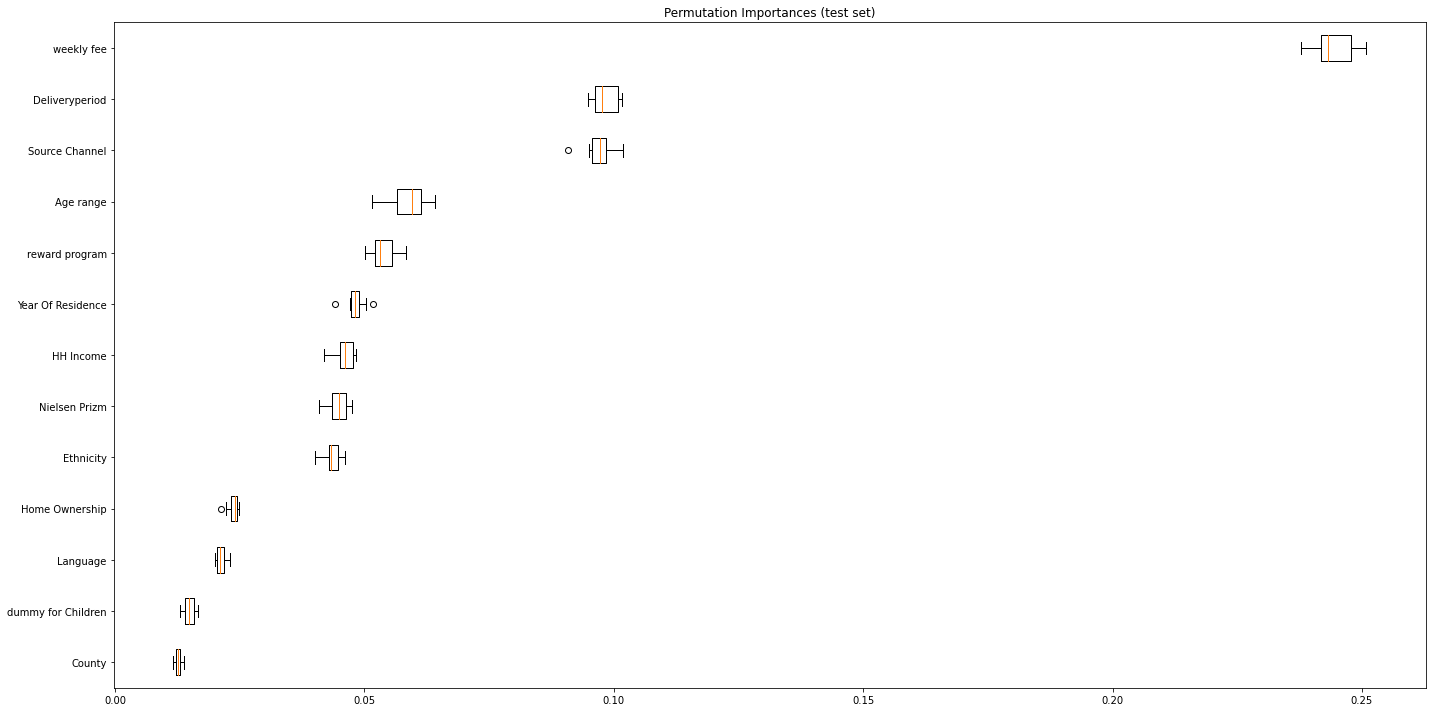

In [26]:
from sklearn.ensemble import RandomForestClassifier

scores_1['rf'] = getScores(X, RandomForestClassifier())

The 3 most important features for this model are `Deliveryperiod`, `Source Channel` and `weekly fee`.

This model performed the best out of all model with an accuracy of ~0.75, this is expected since it is an ensemble model. There is obvious overfitting similar to the decision tree.

The training time is slow.

## Multi-layer Perceptron Neural Network

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:   25.5s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:   25.6s remaining:   59.9s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:   26.0s remaining:   52.1s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:   26.2s remaining:   45.2s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:   26.2s remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:   48.2s remaining:  1.1min
[Pa

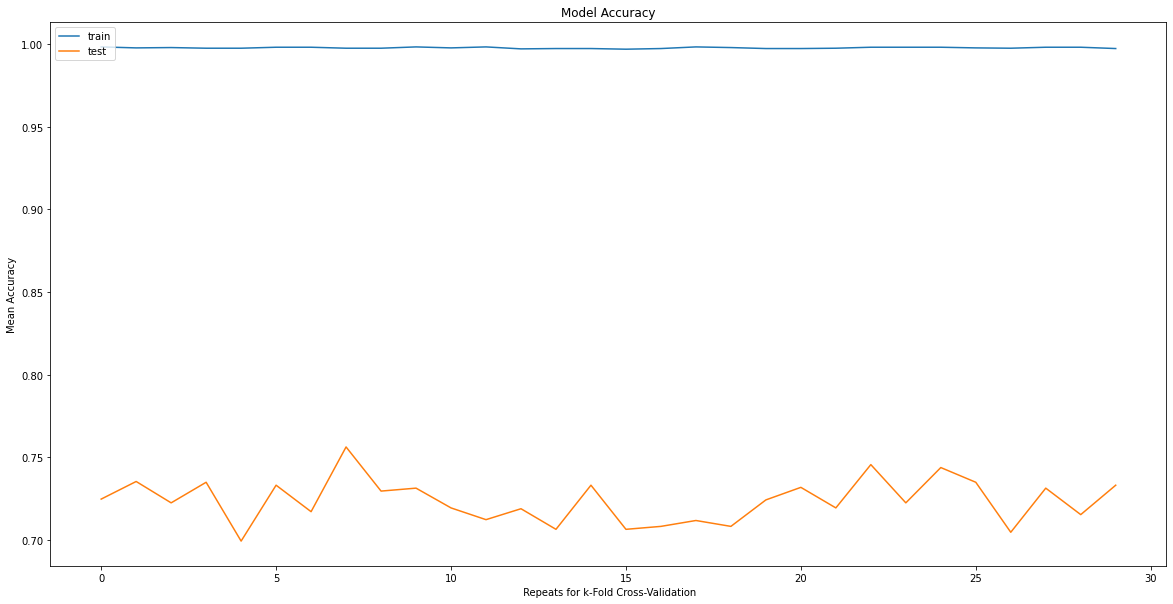

MLPClassifier
{'fit_time': array([23.06249475, 23.285496  , 22.70949006, 23.18548822, 23.50548291,
       23.3384943 , 23.13849068, 23.97510076, 24.00209522, 23.58149147,
       23.13649535, 23.75155354, 23.27793145, 23.03092599, 23.55091453,
       22.79091907, 22.79892492, 23.32192135, 23.26992798, 23.0599165 ,
       23.65691662, 23.54731202, 23.4533124 , 23.45130348,  9.24772573,
        9.19573402,  8.97272968,  9.23972058,  8.70472503,  8.7849021 ]), 'score_time': array([0.02899718, 0.02699947, 0.02500248, 0.02600312, 0.02100539,
       0.02299643, 0.02500916, 0.02600288, 0.02599764, 0.02699876,
       0.02399778, 0.02600241, 0.03499079, 0.02500296, 0.02099991,
       0.02600145, 0.0240047 , 0.02700138, 0.02399611, 0.02399564,
       0.0230062 , 0.02099276, 0.01799965, 0.01700783, 0.00799847,
       0.00899792, 0.00999665, 0.00917768, 0.00799966, 0.00800085]), 'test_acc': array([0.72468917, 0.73534636, 0.72241993, 0.73487544, 0.69928826,
       0.73309609, 0.71708185, 0.75622776,

c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


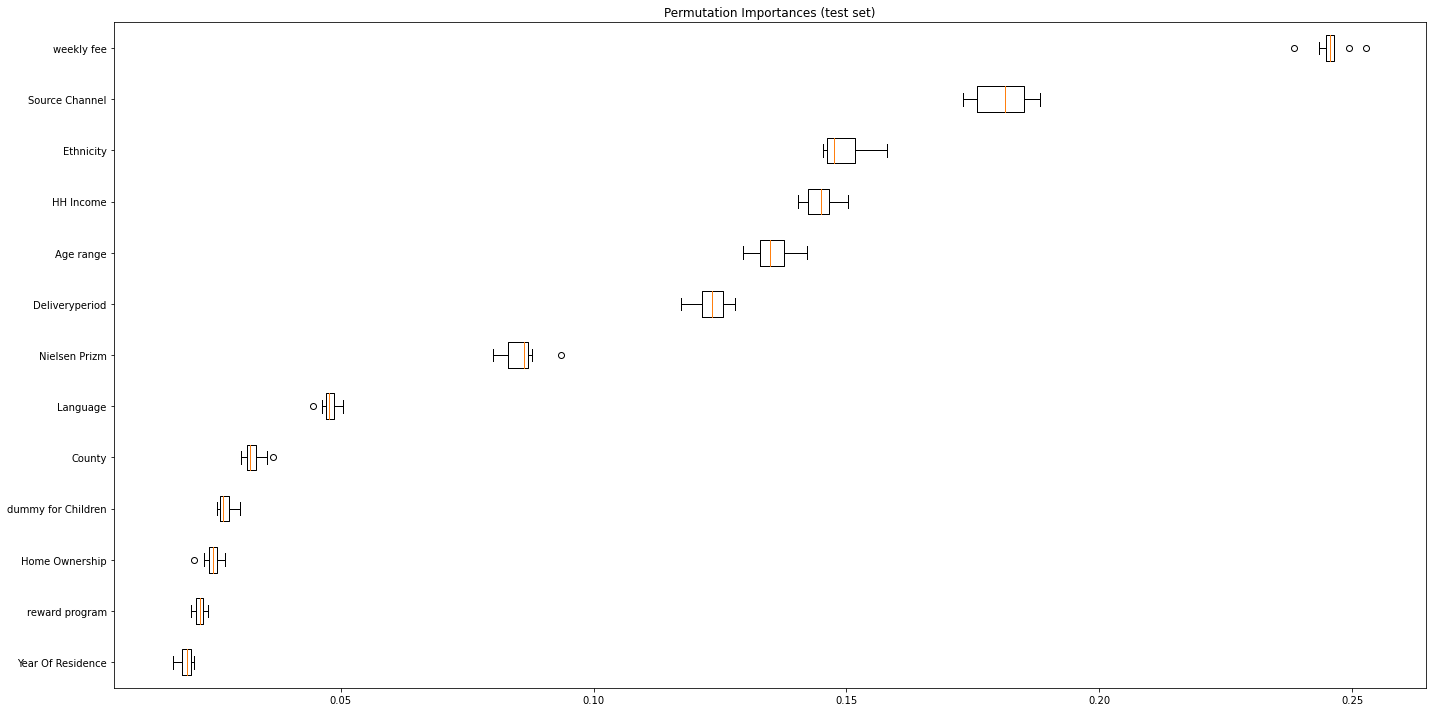

In [27]:
from sklearn.neural_network import MLPClassifier

scores_1['mlp'] = getScores(X, MLPClassifier())

The 3 most important features for this model are `Source Channel`, `weekly fee` and `Source Channel`.

The accuracy of this model is similar to logistic regression. There is overfitting with the training metrics being much higher than the testing metrics.

The training time of this model is extremely slow.

Since `Home Ownership` and `dummy for Children` often ranks badly in feature importance, we will try removing them and run the models again.

In [28]:
X_drop = X.drop(['dummy for Children','Home Ownership'], axis=1)
onehot_cat.remove('dummy for Children')
onehot_cat.remove('Home Ownership')

In [29]:
def runAll(X, scores_):
    
    scores_['lr'] = getScores(X_drop, LogisticRegression(), False)
    print('\n')
    scores_['bnb'] = getScores(X_drop, BernoulliNB(), False)
    print('\n')
    scores_['gnb'] = getScores(X_drop, GaussianNB(), False)
    print('\n')
    scores_['dt'] = getScores(X_drop, DecisionTreeClassifier(), False)
    print('\n')
    scores_['sgd'] = getScores(X_drop, SGDClassifier(), False)
    print('\n')
    scores_['rf'] = getScores(X_drop, RandomForestClassifier(), False)
    print('\n')
    scores_['mlp'] = getScores(X_drop, MLPClassifier(), False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.4s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.4s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    3.2s remaining:    4.2s
[Pa

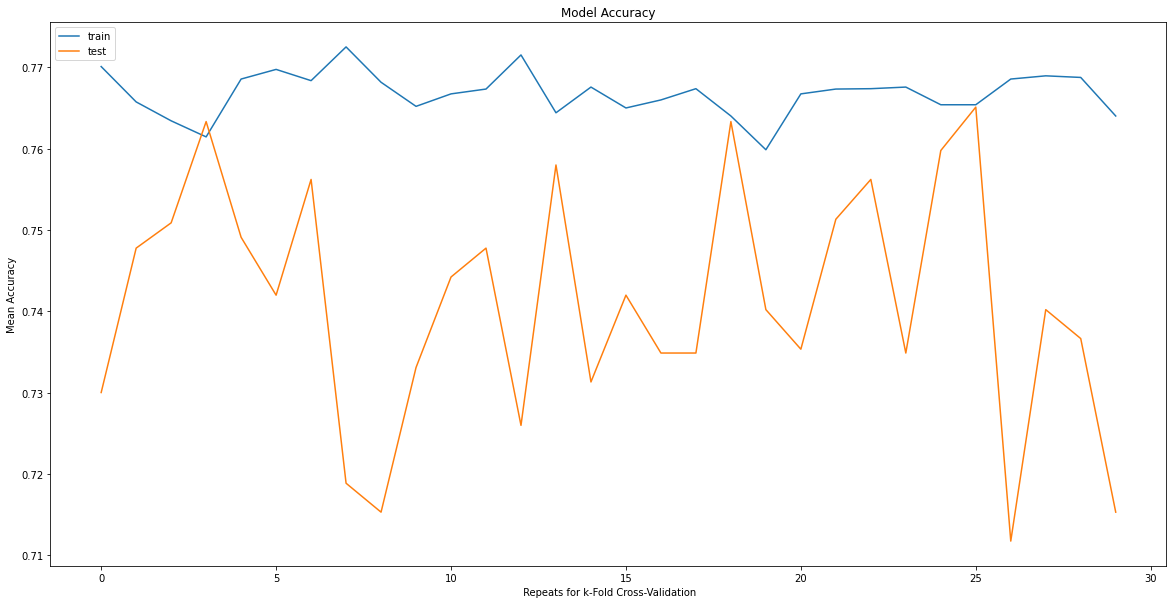

LogisticRegression
{'fit_time': array([0.54599953, 0.66200185, 0.6680007 , 0.6179986 , 0.65500045,
       0.64300108, 0.62399817, 0.63900185, 0.65600157, 0.68599963,
       0.63200188, 0.66099834, 0.74300003, 0.66699767, 0.71900105,
       0.6359992 , 0.64000368, 0.64099908, 0.62700033, 0.71400046,
       0.64200211, 0.68100071, 0.6770041 , 0.66399956, 0.27800274,
       0.32499504, 0.35799646, 0.37399697, 0.32299972, 0.34599781]), 'score_time': array([0.01800275, 0.01599836, 0.0139966 , 0.01700115, 0.01799941,
       0.01699924, 0.01600337, 0.01700163, 0.01499939, 0.01299906,
       0.01300097, 0.01300144, 0.01499772, 0.01500297, 0.01999903,
       0.01800394, 0.01599765, 0.0150044 , 0.0160017 , 0.0179987 ,
       0.0199964 , 0.01300192, 0.01399851, 0.01200438, 0.00899863,
       0.01000118, 0.00700116, 0.00899816, 0.00900149, 0.0079999 ]), 'test_acc': array([0.73001776, 0.74777975, 0.75088968, 0.7633452 , 0.74911032,
       0.74199288, 0.75622776, 0.71886121, 0.71530249, 0.73309609,


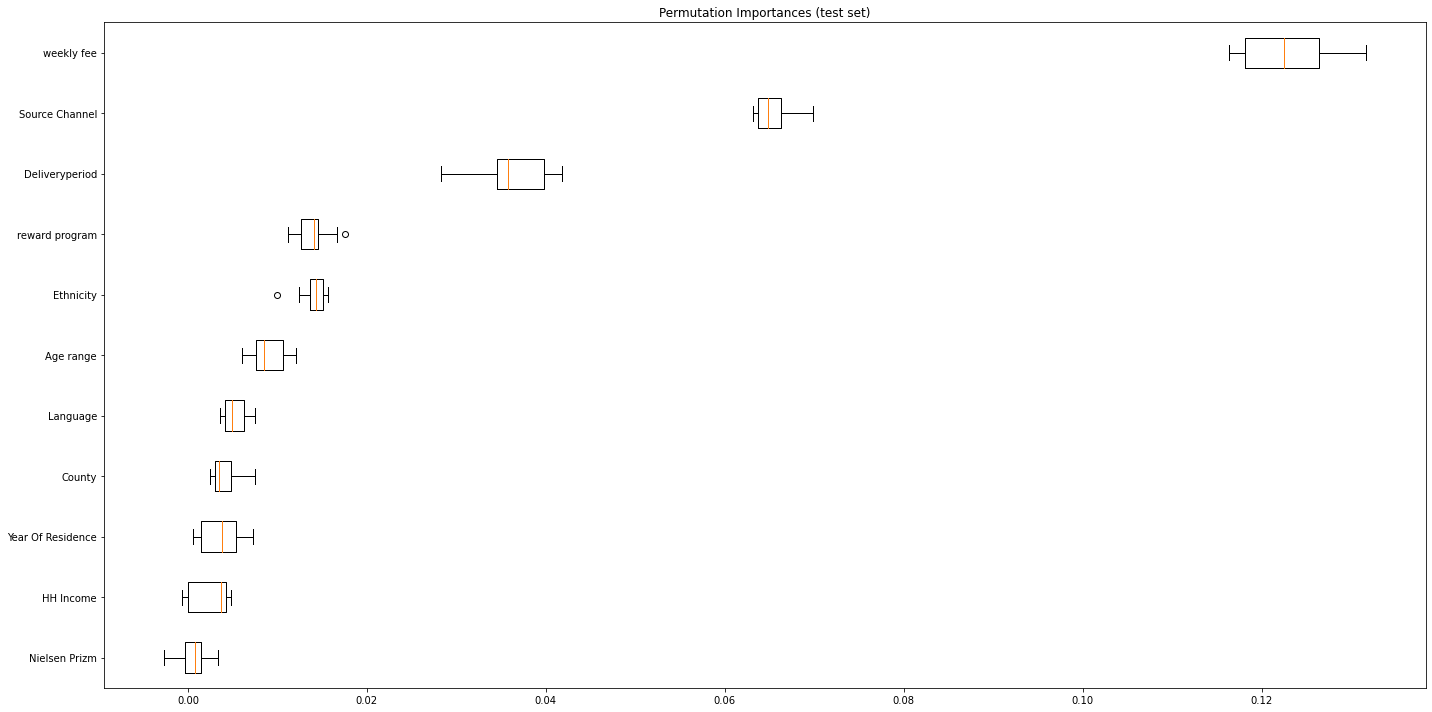



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    1.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.2s remaining:    2.9s
[

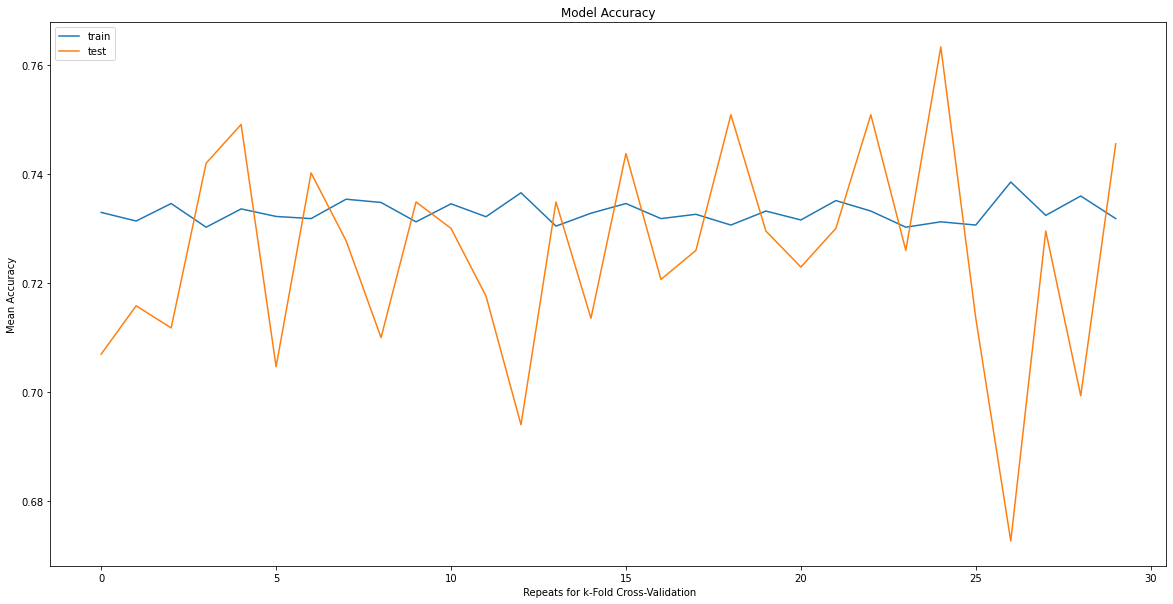

BernoulliNB
{'fit_time': array([0.1259973 , 0.12199831, 0.12399793, 0.14199948, 0.15900397,
       0.15599895, 0.16000152, 0.16599655, 0.12299919, 0.15400362,
       0.16399908, 0.15399957, 0.145998  , 0.1449964 , 0.15899611,
       0.15599871, 0.15399575, 0.19000149, 0.18799901, 0.18200374,
       0.19300151, 0.18999672, 0.18599868, 0.17399883, 0.15799594,
       0.14899659, 0.14999604, 0.14099789, 0.14799714, 0.09699845]), 'score_time': array([0.01700282, 0.01400232, 0.01800084, 0.01999831, 0.01399851,
       0.01400256, 0.01399946, 0.01500154, 0.01499867, 0.01400042,
       0.01800489, 0.01999974, 0.02000284, 0.01900101, 0.01500249,
       0.0200007 , 0.02099848, 0.01699948, 0.02100301, 0.01799989,
       0.01600027, 0.0170002 , 0.0139997 , 0.01600146, 0.01000094,
       0.00900149, 0.01399922, 0.01000047, 0.01499915, 0.00799966]), 'test_acc': array([0.70692718, 0.71580817, 0.71174377, 0.74199288, 0.74911032,
       0.70462633, 0.74021352, 0.72775801, 0.70996441, 0.73487544,
       

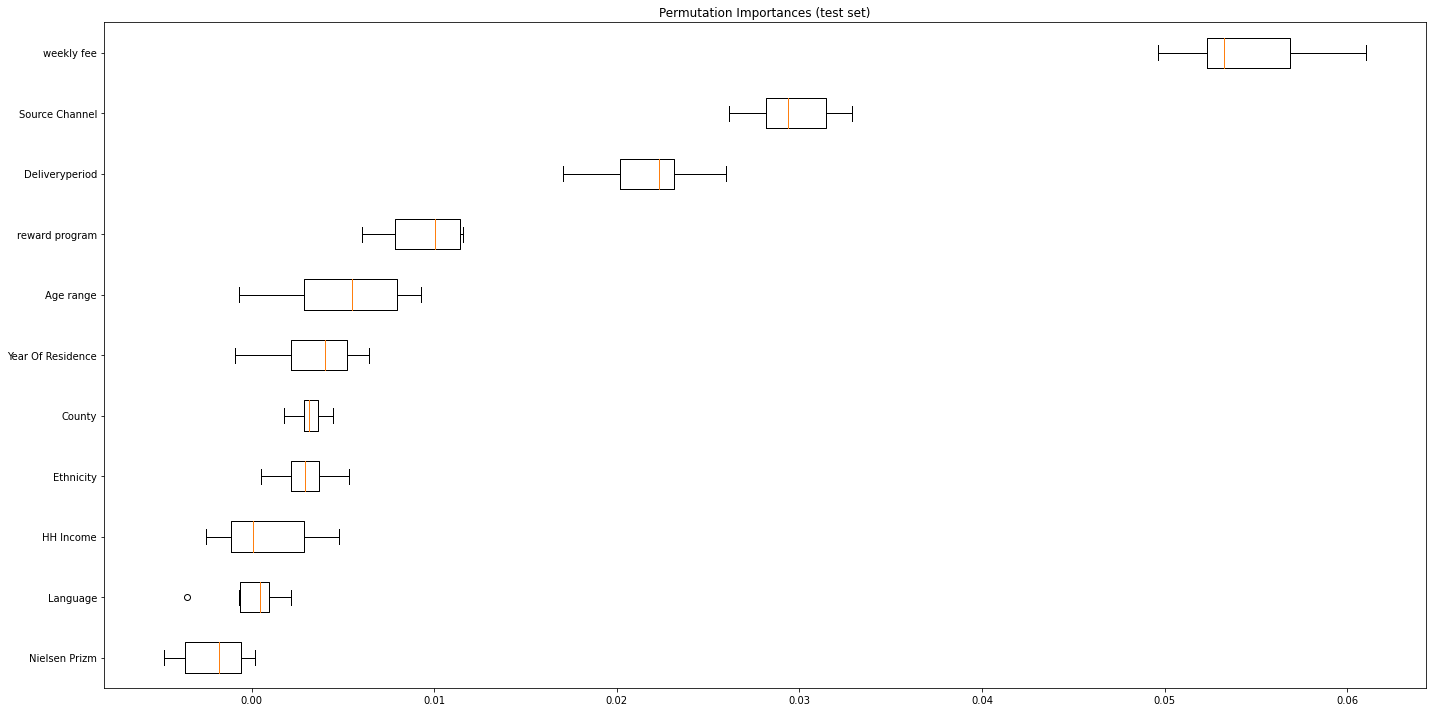



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.4s remaining:    3.1s
[

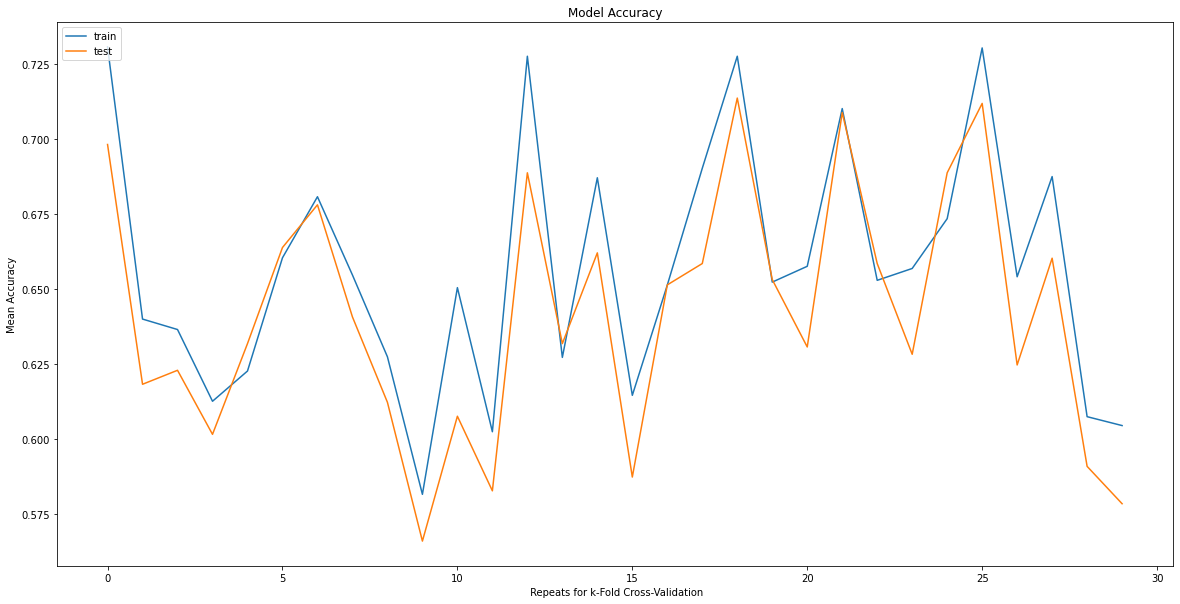

GaussianNB
{'fit_time': array([0.13899899, 0.15499473, 0.19899797, 0.17099833, 0.19699621,
       0.18700075, 0.21151352, 0.21951246, 0.20851851, 0.20351291,
       0.20751619, 0.20351291, 0.17199779, 0.20099735, 0.22499967,
       0.20499825, 0.21299505, 0.22000098, 0.21000147, 0.24700069,
       0.23199368, 0.22600174, 0.23199701, 0.22999763, 0.20999694,
       0.16899824, 0.17507029, 0.16399693, 0.14099479, 0.15799809]), 'score_time': array([0.02100039, 0.01900125, 0.02200103, 0.02599931, 0.0205183 ,
       0.02699876, 0.02999878, 0.02599907, 0.02899623, 0.02200222,
       0.02399802, 0.02500129, 0.02400208, 0.02300072, 0.02300143,
       0.0279994 , 0.02100492, 0.02499962, 0.02999878, 0.02699828,
       0.02500296, 0.02399969, 0.02700162, 0.02800059, 0.01799893,
       0.01399946, 0.01692843, 0.01300073, 0.01200104, 0.01199818]), 'test_acc': array([0.69804618, 0.61811723, 0.6227758 , 0.60142349, 0.6316726 ,
       0.66370107, 0.67793594, 0.6405694 , 0.61209964, 0.5658363 ,
       0

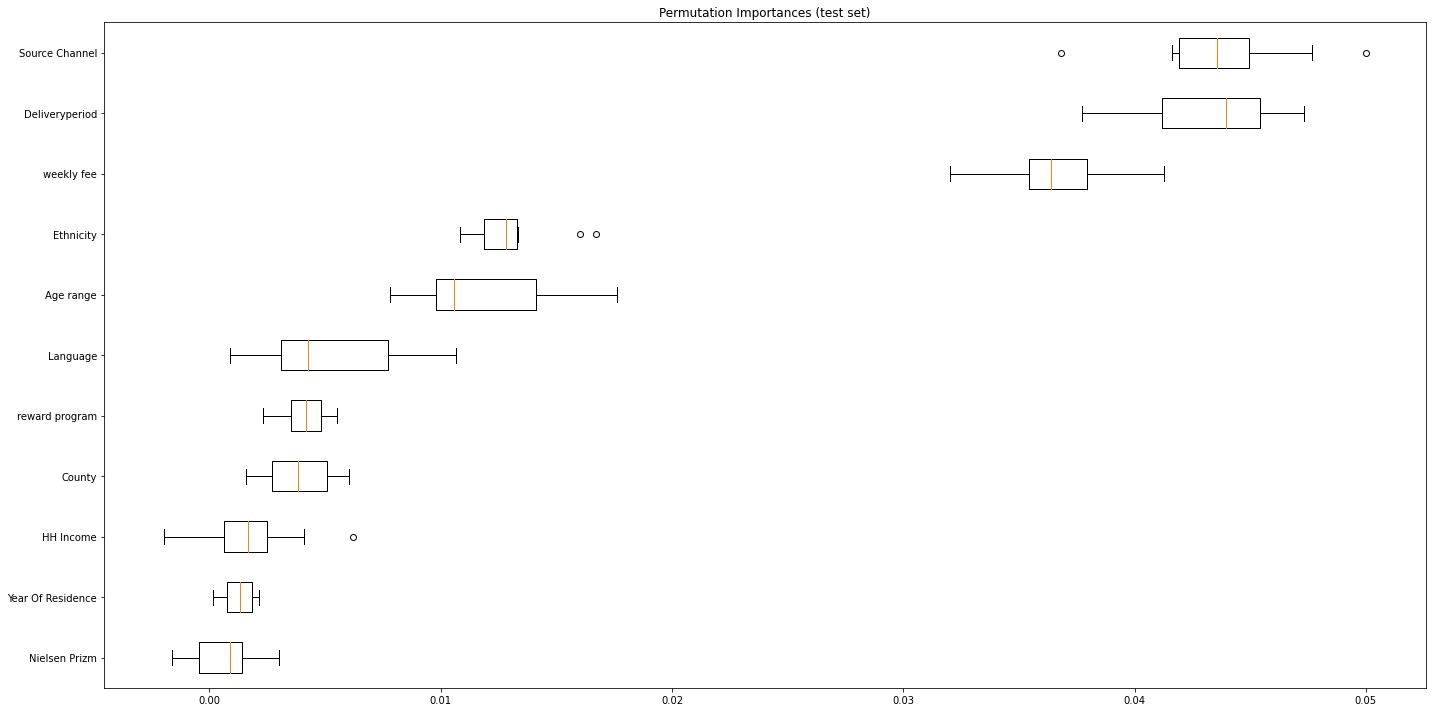



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.5s remaining:    3.3s
[

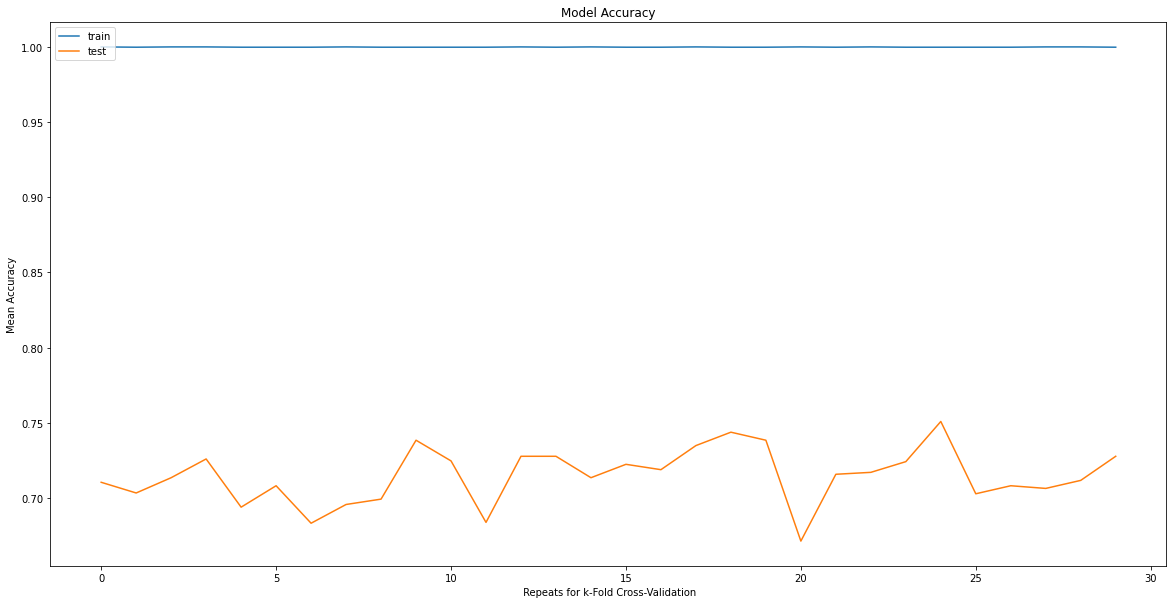

DecisionTreeClassifier
{'fit_time': array([0.35099602, 0.34499717, 0.34099507, 0.34899712, 0.34299636,
       0.35399723, 0.35999942, 0.34799886, 0.34899712, 0.33499908,
       0.34199882, 0.33099914, 0.36500192, 0.35300112, 0.3789959 ,
       0.35800028, 0.36499929, 0.36100149, 0.35199952, 0.35100079,
       0.35400224, 0.35199952, 0.33900118, 0.34099913, 0.26899767,
       0.21299839, 0.20099449, 0.19599557, 0.15699649, 0.19799662]), 'score_time': array([0.01100087, 0.01199865, 0.01000166, 0.01200056, 0.01000023,
       0.01300645, 0.01399994, 0.01099849, 0.01500273, 0.01199651,
       0.01700115, 0.01400065, 0.01099968, 0.01199555, 0.01000166,
       0.01199985, 0.0140028 , 0.01300287, 0.01200438, 0.01300097,
       0.01399779, 0.01199841, 0.01400137, 0.01600361, 0.00699782,
       0.00899839, 0.0080018 , 0.0079999 , 0.00800276, 0.00700021]), 'test_acc': array([0.71047957, 0.70337478, 0.71352313, 0.72597865, 0.69395018,
       0.70818505, 0.68327402, 0.69572954, 0.69928826, 0.738434

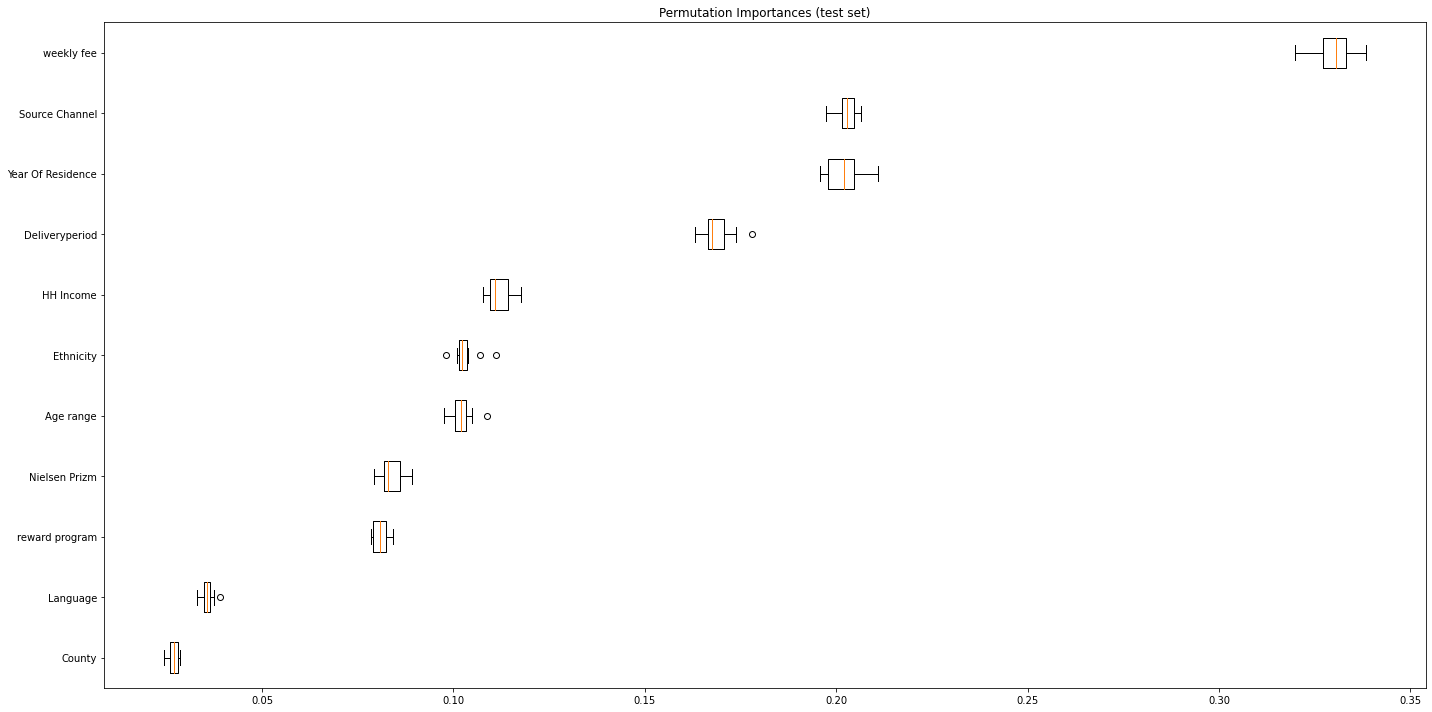



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.5s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.8s remaining:    3.7s
[

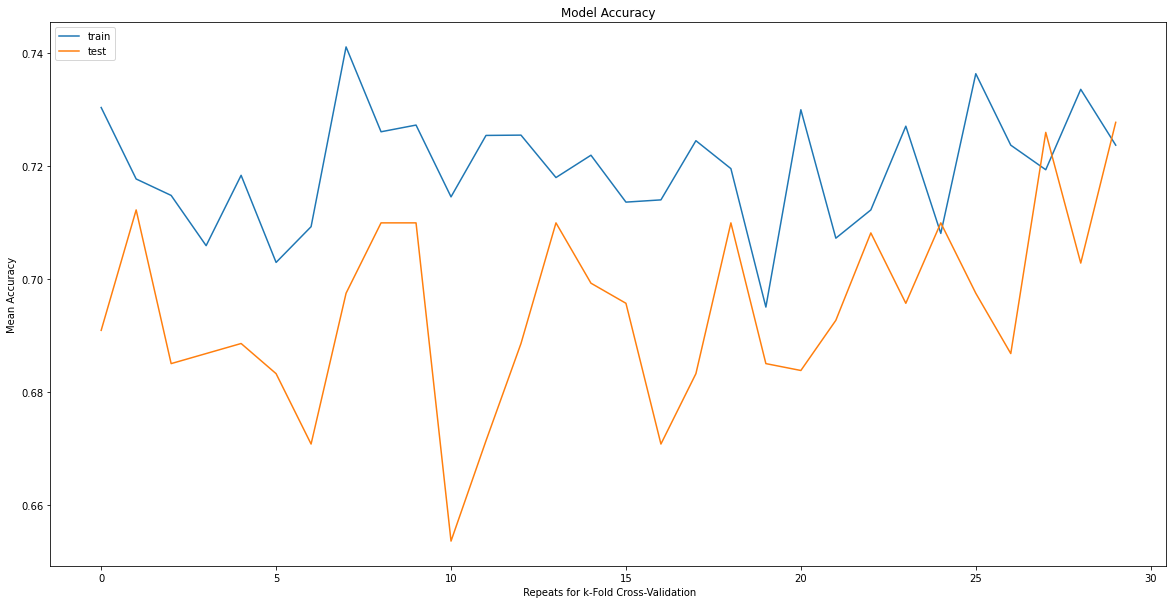

SGDClassifier
{'fit_time': array([0.57900047, 0.54199743, 0.35099435, 0.40299654, 0.65899825,
       0.50499415, 0.34999728, 0.69199824, 0.71299767, 0.60199904,
       0.47199774, 0.6869998 , 0.79200029, 0.61799908, 0.66300058,
       0.48799801, 0.51800179, 0.75100207, 0.68199873, 0.60999799,
       0.63651609, 0.41399956, 0.62051487, 0.51651692, 0.45951509,
       0.54751277, 0.56751442, 0.39251399, 0.48351669, 0.34451532]), 'score_time': array([0.0129981 , 0.01099896, 0.01100087, 0.01100111, 0.01400256,
       0.01100016, 0.01100159, 0.01100159, 0.01300049, 0.01199913,
       0.01200128, 0.01400328, 0.01099944, 0.01199985, 0.00999856,
       0.01100063, 0.01099777, 0.0125165 , 0.01099849, 0.01199985,
       0.01299739, 0.0120008 , 0.00800061, 0.01200223, 0.01000071,
       0.00900126, 0.00599861, 0.00800037, 0.00599933, 0.00800014]), 'test_acc': array([0.69094139, 0.71225577, 0.68505338, 0.68683274, 0.6886121 ,
       0.68327402, 0.67081851, 0.6975089 , 0.70996441, 0.70996441,
     

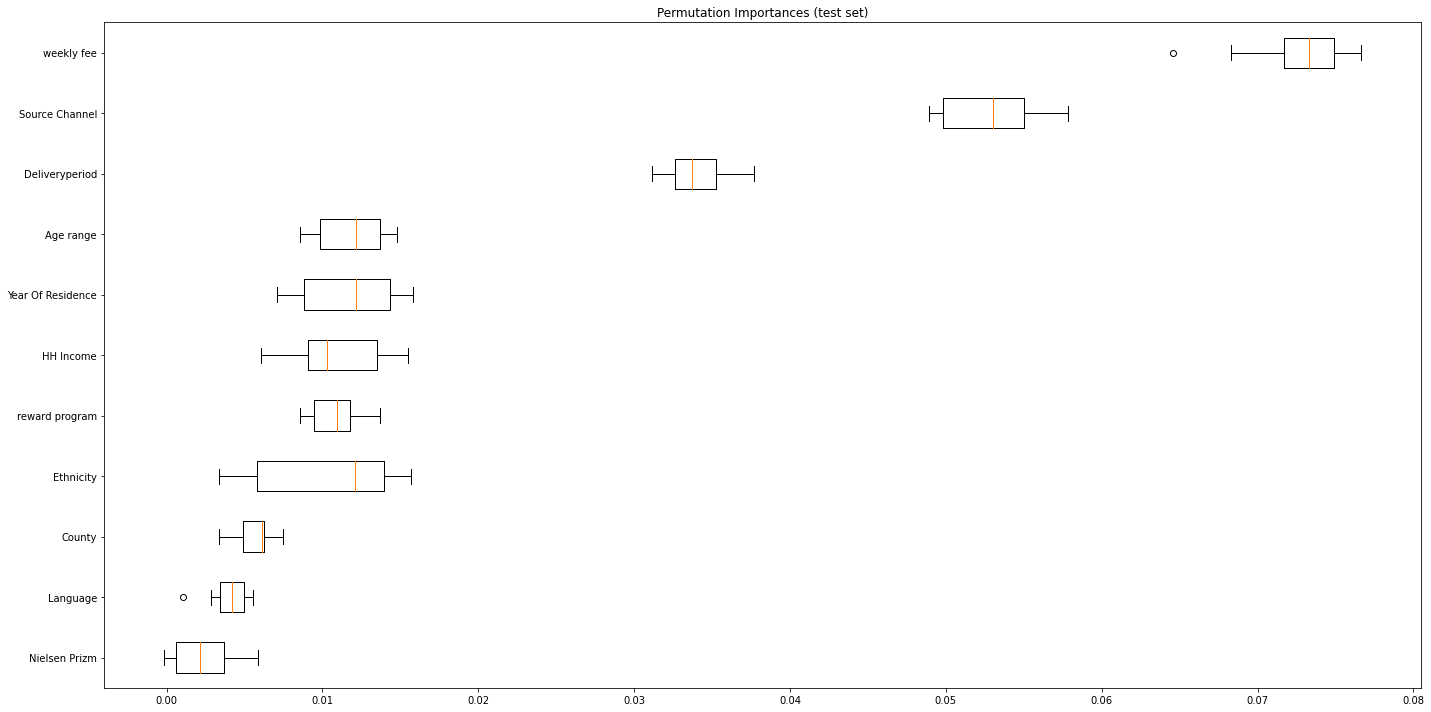



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    3.6s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    3.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    3.6s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    3.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    5.3s remaining:    7.0s
[

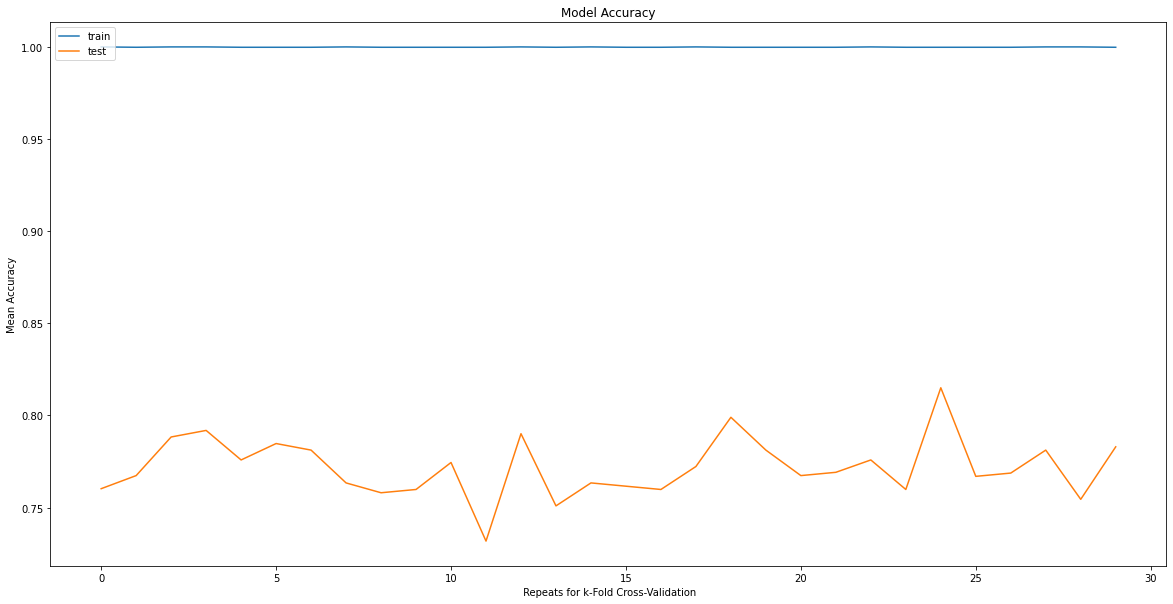

RandomForestClassifier
{'fit_time': array([1.5000031 , 1.58400464, 1.49900532, 1.52800441, 1.54600286,
       1.55400729, 1.46599913, 1.54900575, 1.52300429, 1.50900459,
       1.5480032 , 1.52700162, 1.54252768, 1.53952909, 1.54053116,
       1.49952364, 1.5395267 , 1.54752564, 1.54852414, 1.59953046,
       1.60552382, 1.55552983, 1.57852864, 1.57452726, 0.98050618,
       0.95850825, 1.03652573, 0.92550945, 0.86153603, 0.83750987]), 'score_time': array([0.04400015, 0.04299617, 0.04199338, 0.04300237, 0.04500031,
       0.04499841, 0.04600263, 0.04599452, 0.04399681, 0.04500437,
       0.04500008, 0.04499888, 0.04299927, 0.04499936, 0.04199696,
       0.0409987 , 0.04300213, 0.04400206, 0.04100299, 0.04299521,
       0.04199934, 0.04299426, 0.04399824, 0.04399872, 0.02499914,
       0.02800322, 0.03000069, 0.03500104, 0.02597785, 0.02800012]), 'test_acc': array([0.76021314, 0.76731794, 0.78825623, 0.79181495, 0.77580071,
       0.78469751, 0.78113879, 0.7633452 , 0.75800712, 0.759786

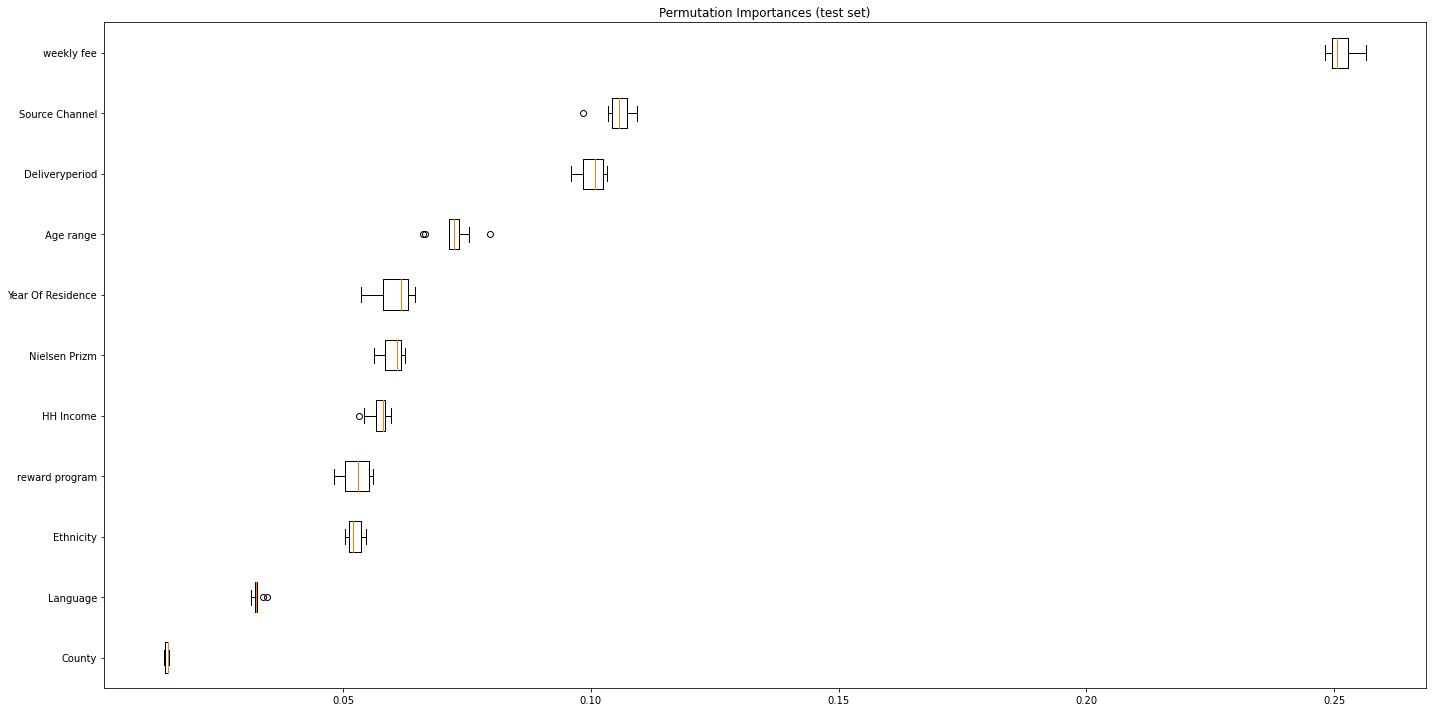



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:   25.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:   25.4s remaining:   59.3s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:   25.7s remaining:   51.5s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:   25.7s remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:   25.8s remaining:   38.7s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:   46.8s remaining:  1.0min
[

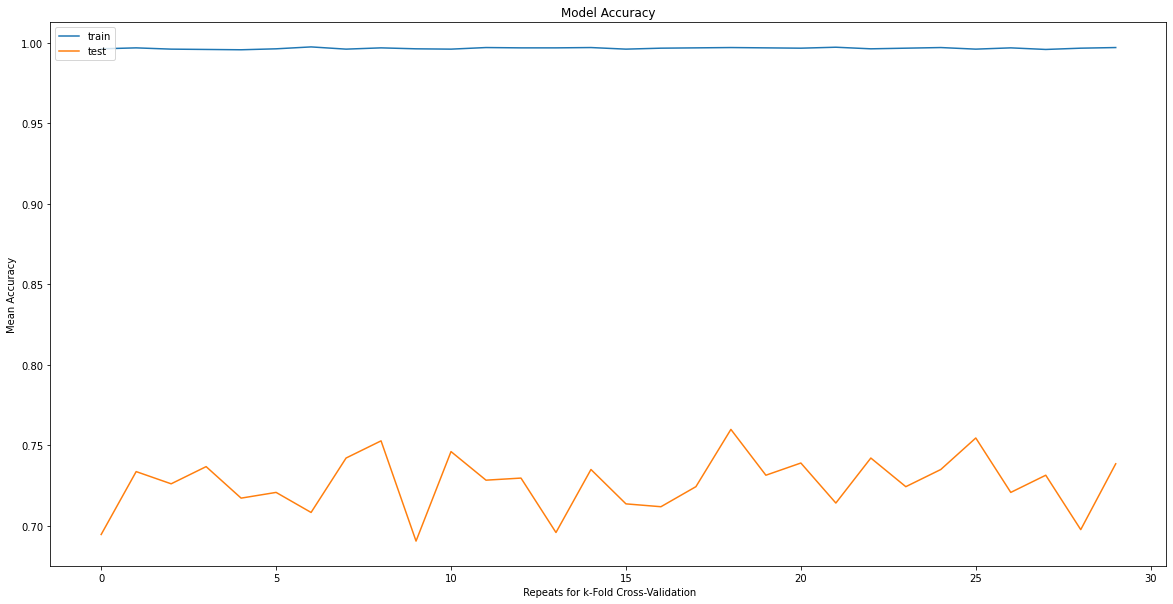

MLPClassifier
{'fit_time': array([21.9797821 , 22.63379359, 23.21386003, 22.6278677 , 22.59379196,
       23.35486221, 21.97879219, 22.13379169, 22.55779219, 22.9288578 ,
       23.40387082, 22.5488596 , 22.60715294, 22.2990644 , 22.8791461 ,
       22.49406147, 22.34906197, 22.86006737, 22.57406616, 22.55406952,
       23.0560689 , 22.80505967, 22.79706645, 23.06961966,  9.3982048 ,
        9.04521441,  8.87022829,  8.94425893,  8.80123401,  8.6872251 ]), 'score_time': array([0.03400755, 0.02407169, 0.02500916, 0.02299929, 0.02307177,
       0.025002  , 0.02299786, 0.02800179, 0.02499342, 0.02599788,
       0.02499318, 0.02500153, 0.02399445, 0.02408099, 0.02299714,
       0.02400327, 0.02700877, 0.02399778, 0.02199936, 0.0219996 ,
       0.01599908, 0.01899576, 0.01853299, 0.01697946, 0.01101327,
       0.00900412, 0.00902605, 0.00797105, 0.00799656, 0.00800014]), 'test_acc': array([0.69449378, 0.73357016, 0.72597865, 0.7366548 , 0.71708185,
       0.72064057, 0.70818505, 0.74199288,

c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


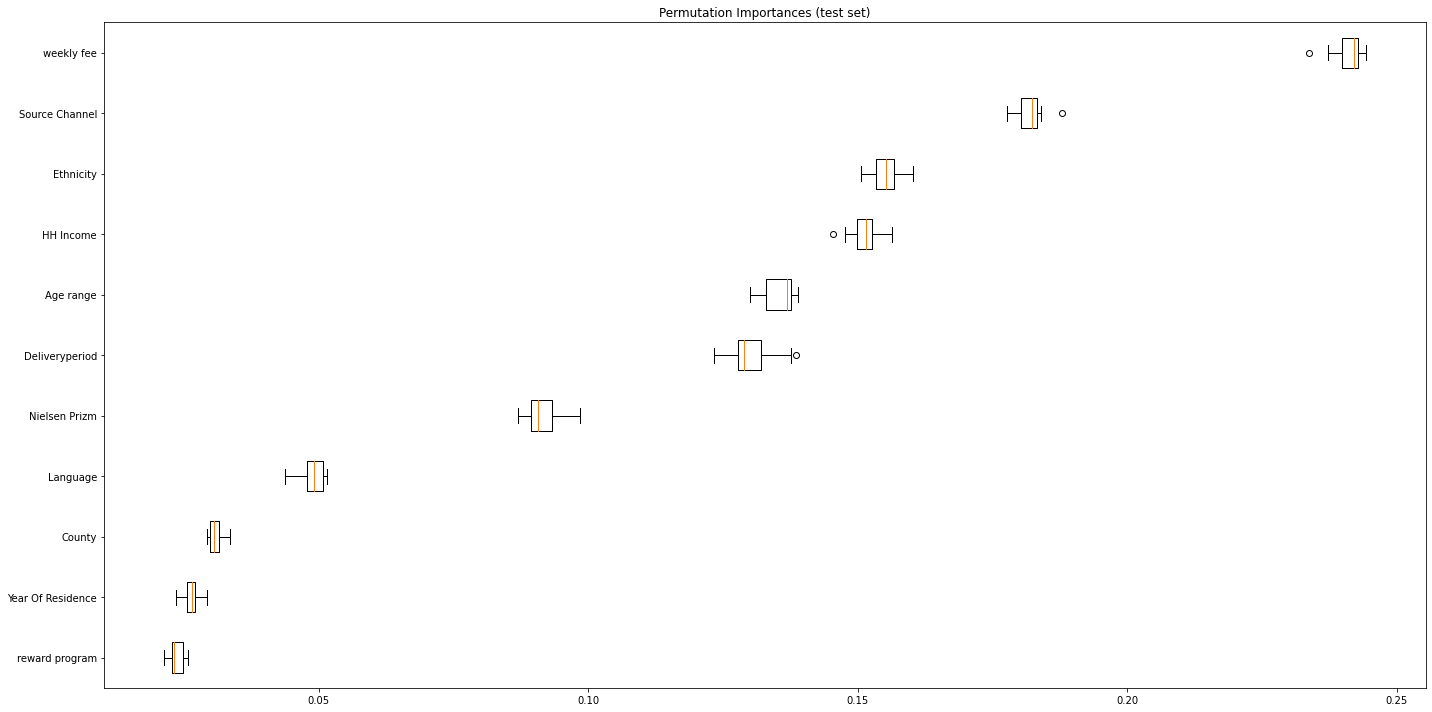

In [30]:
scores_2 = dict()
runAll(X_drop, scores_2)

Change from scores 1 to scores 2


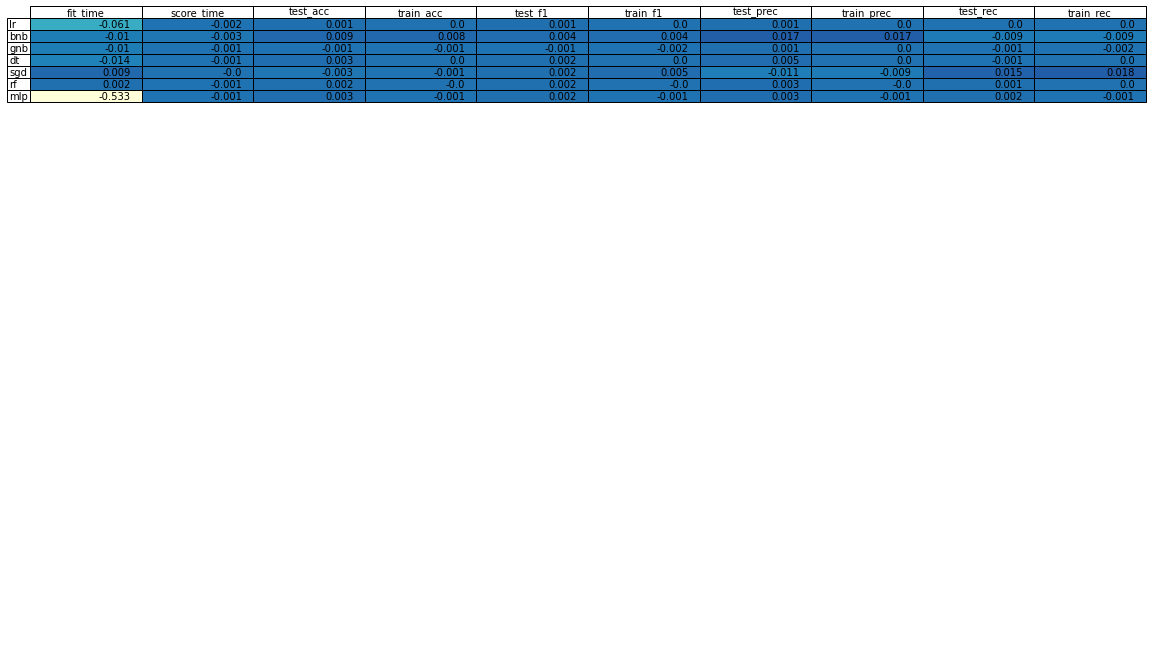

In [31]:
from sklearn.preprocessing import MinMaxScaler
#show change in metrics after DATA TRANSFORMATION (affects all models)
def showChange(scores_1,scores_2,model=None):
    cell_text = []
    row_label = list(scores_1.keys())
    col_label = ['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_f1', 'train_f1', 'test_prec', 'train_prec', 'test_rec', 'train_rec']
    print('Change from scores 1 to scores 2')
    if not model:
        for key2 in scores_2:
            score_change = []
            for i in scores_2[key2]:
                m_scores_2 = np.mean(scores_2[key2][i])
                m_scores_1 = np.mean(scores_1[key2][i])
                score_change.append(round(m_scores_2 - m_scores_1,3))
                #print("{}: {:.3f}".format(i, m_scores_2 - m_scores_1 ))
            cell_text.append(score_change)
    else:    
        row_label=[model]
        scores_1=scores_1[model]
        score_change = []
        for i in scores_2:
            m_scores_2 = np.mean(scores_2[i])
            m_scores_1 = np.mean(scores_1[i])
            score_change.append(round(m_scores_2 - m_scores_1,3))
            #print("{}: {:.3f}".format(i, m_scores_2 - m_scores_1 ))
        cell_text.append(score_change)
    cell_text = np.array(cell_text)
    dim = cell_text.shape
    cell_reshape = cell_text.reshape(-1,1)
    
    cell_colours = plt.cm.YlGnBu(np.reshape(MinMaxScaler(feature_range=(-0.75,0.75)).fit_transform(cell_reshape),dim))

    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    plt.table(cellText=cell_text,
                      rowLabels=row_label,
                      colLabels=col_label,
             cellColours=cell_colours,
             loc='top')
showChange(scores_1,scores_2)

There are no significant changes, since it simplifies the model, we will keep those features removed.

In [32]:
X = X_drop

We will also try transforming the `Year Of Residence` since it suffers from bias.

In [33]:
X_boxcox = X
X_boxcox['Year Of Residence'] = stats.boxcox(X_boxcox['Year Of Residence'])[0]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.4s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.4s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.4s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.4s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    3.1s remaining:    4.1s
[Pa

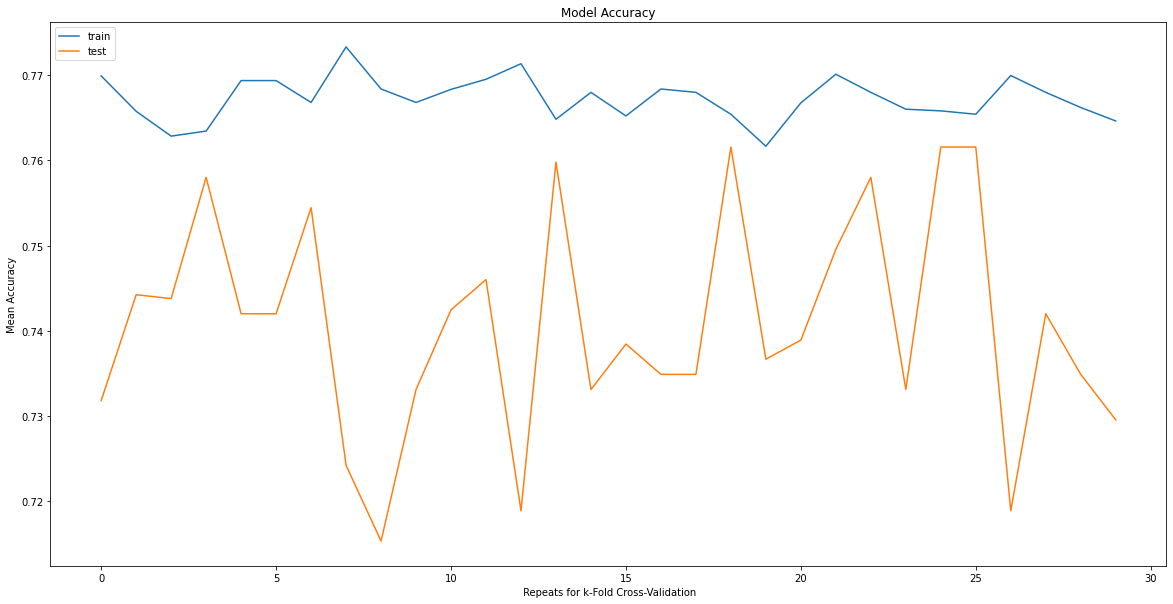

LogisticRegression
{'fit_time': array([0.69000053, 0.63599968, 0.57999825, 0.67299986, 0.67100215,
       0.66299772, 0.64099932, 0.65599799, 0.67000151, 0.63099909,
       0.70899892, 0.65299869, 0.6329987 , 0.60999942, 0.71200061,
       0.69200373, 0.74199939, 0.67900038, 0.7139945 , 0.72399831,
       0.73699665, 0.63699889, 0.65400004, 0.71100163, 0.4389987 ,
       0.40999579, 0.3660028 , 0.36399865, 0.38499951, 0.34000254]), 'score_time': array([0.01699972, 0.02200103, 0.02000284, 0.01700234, 0.01199937,
       0.01600337, 0.01699972, 0.01600266, 0.01399851, 0.01700234,
       0.01399946, 0.01600218, 0.01899981, 0.01900196, 0.0159986 ,
       0.01599741, 0.01600099, 0.01899767, 0.01900029, 0.01800227,
       0.01399899, 0.01800203, 0.01600051, 0.01699853, 0.00999832,
       0.01000261, 0.00799966, 0.00800061, 0.00799966, 0.00800037]), 'test_acc': array([0.73179396, 0.74422735, 0.74377224, 0.75800712, 0.74199288,
       0.74199288, 0.7544484 , 0.72419929, 0.71530249, 0.73309609,


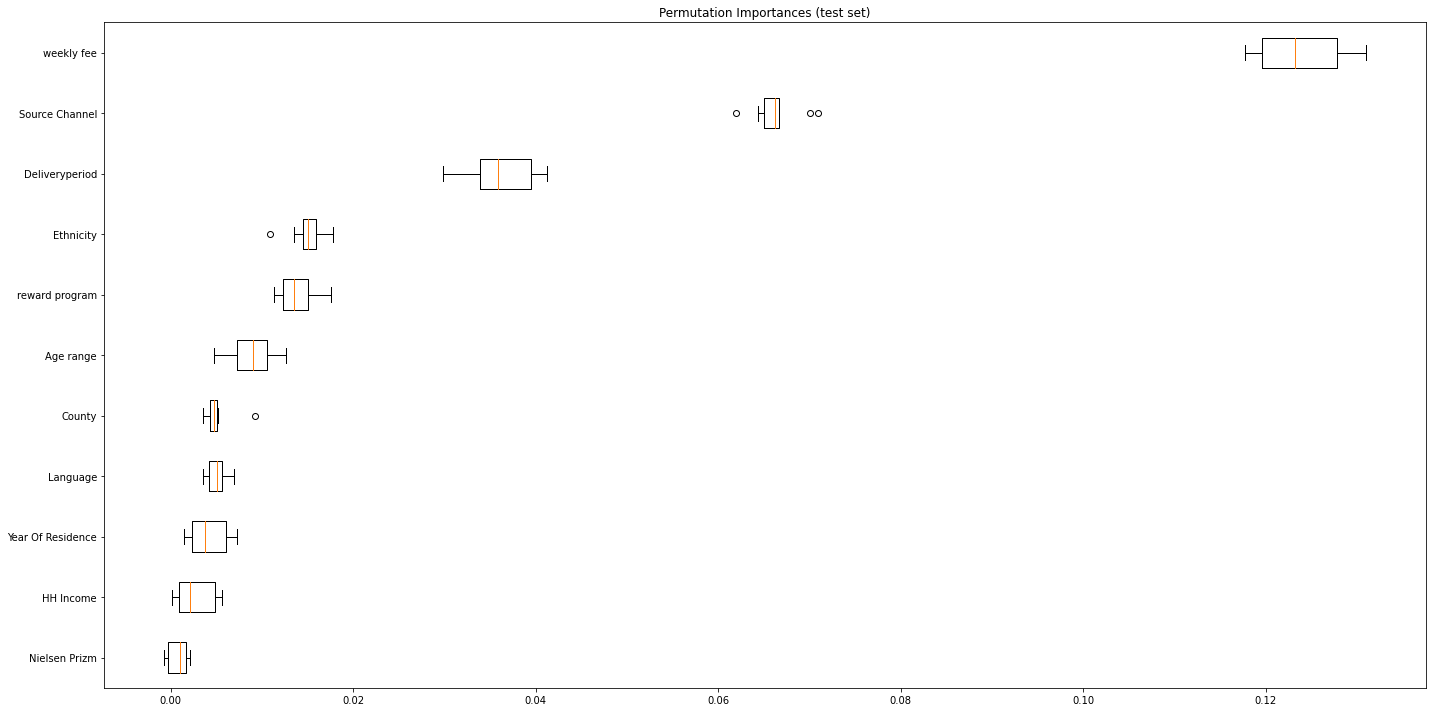



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    1.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    1.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    1.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.2s remaining:    2.9s
[

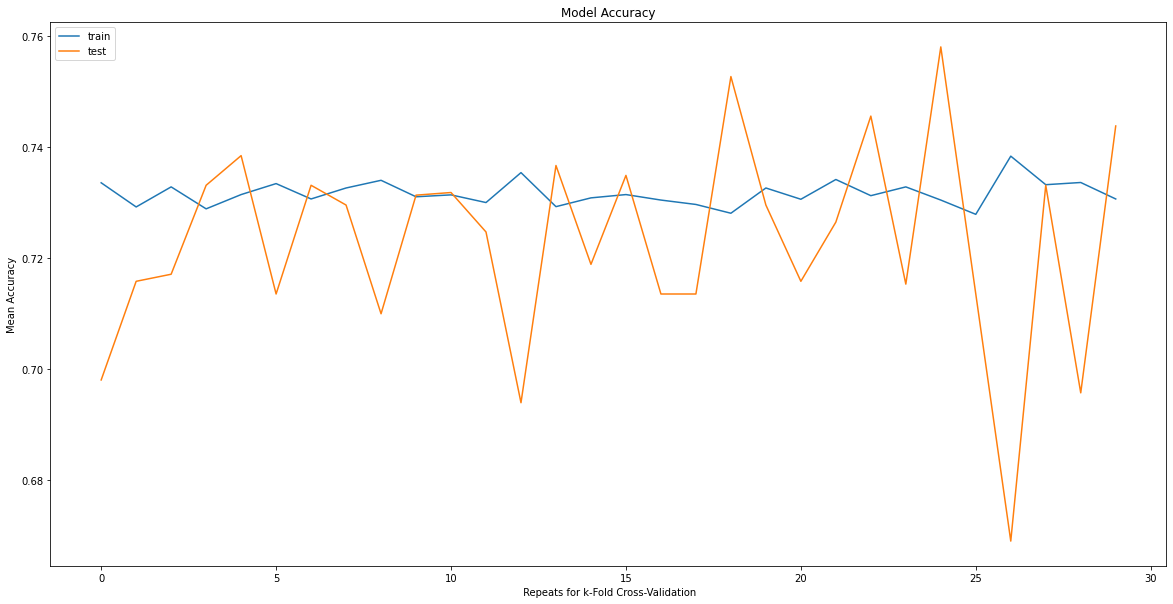

BernoulliNB
{'fit_time': array([0.11700058, 0.16199636, 0.11699724, 0.13599753, 0.15799904,
       0.15799737, 0.14999843, 0.16099739, 0.1469996 , 0.15600252,
       0.16099834, 0.16199732, 0.14899611, 0.14099598, 0.17599773,
       0.16499662, 0.15799809, 0.16899776, 0.17799926, 0.17799735,
       0.18099856, 0.18000031, 0.18099976, 0.17100048, 0.14999509,
       0.14999628, 0.13399887, 0.12400055, 0.12500024, 0.0999999 ]), 'score_time': array([0.01599669, 0.01600361, 0.0170033 , 0.02199745, 0.01500249,
       0.02200294, 0.01500273, 0.01900434, 0.02000117, 0.01799846,
       0.01800394, 0.01800084, 0.02299976, 0.01900172, 0.01800179,
       0.01900005, 0.01999831, 0.01700282, 0.01700258, 0.01800203,
       0.01700354, 0.01599813, 0.0169971 , 0.01800084, 0.0090003 ,
       0.01099992, 0.01000428, 0.00999999, 0.01600266, 0.01200414]), 'test_acc': array([0.69804618, 0.71580817, 0.71708185, 0.73309609, 0.73843416,
       0.71352313, 0.73309609, 0.72953737, 0.70996441, 0.73131673,
       

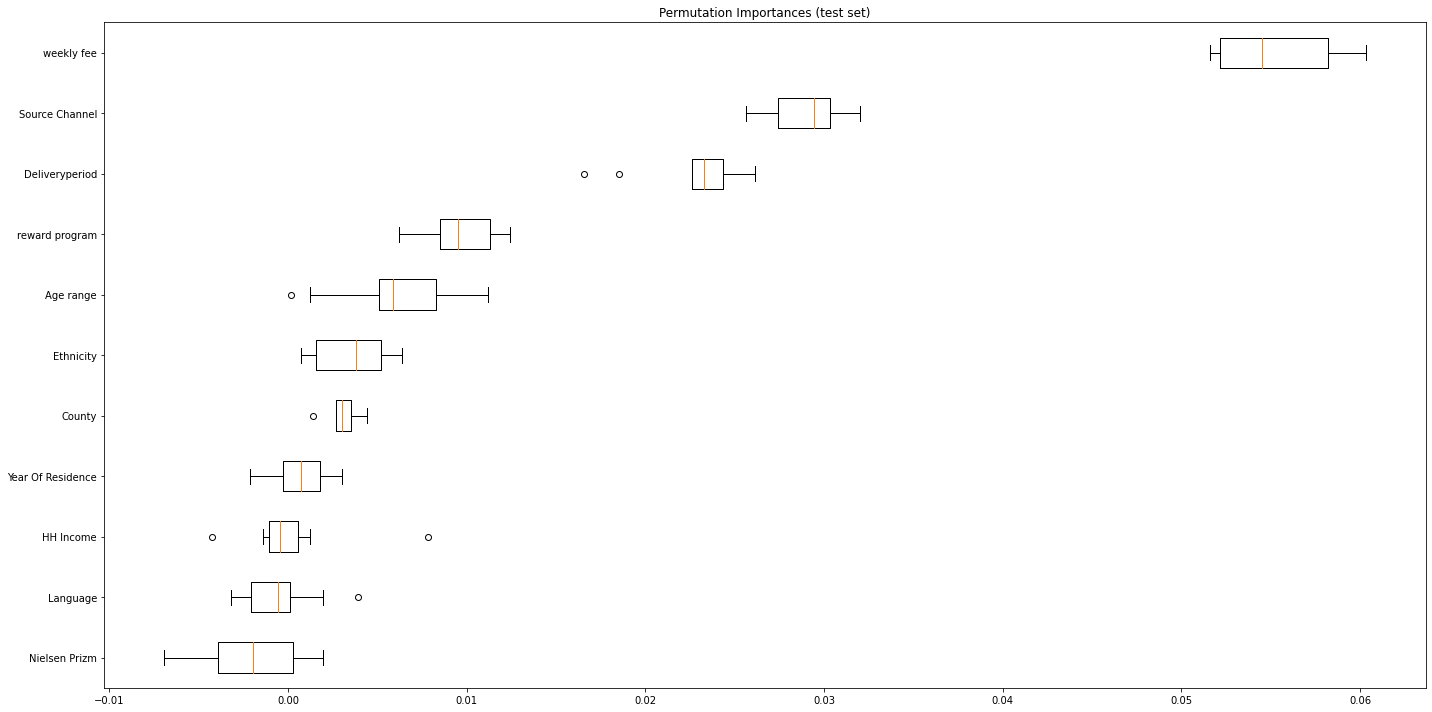



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.1s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.4s remaining:    3.2s
[

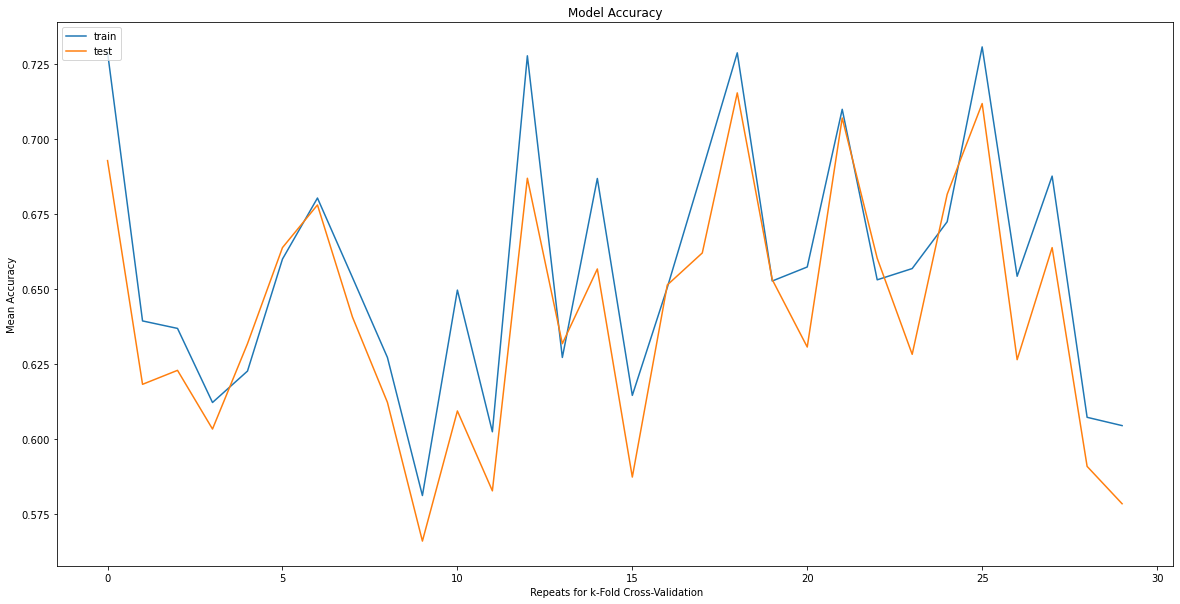

GaussianNB
{'fit_time': array([0.14599848, 0.15799642, 0.15499377, 0.16699696, 0.2079978 ,
       0.17199397, 0.24399757, 0.19599843, 0.19299889, 0.20300126,
       0.21899748, 0.20399857, 0.17799854, 0.1869967 , 0.20799661,
       0.1849978 , 0.19100094, 0.25499868, 0.23800063, 0.22599792,
       0.24200034, 0.23499942, 0.24000072, 0.22899604, 0.21099639,
       0.17899871, 0.19499707, 0.19299507, 0.18299651, 0.11599898]), 'score_time': array([0.02299809, 0.0219996 , 0.02400088, 0.02400017, 0.02300072,
       0.02600098, 0.0210011 , 0.02299905, 0.02599978, 0.03300023,
       0.02399755, 0.02500033, 0.02499747, 0.03800416, 0.02199817,
       0.02300096, 0.02499843, 0.02500176, 0.02599883, 0.03000307,
       0.02299953, 0.02600098, 0.02799678, 0.02300096, 0.01900005,
       0.01399875, 0.01800108, 0.01300001, 0.0200007 , 0.01200175]), 'test_acc': array([0.69271758, 0.61811723, 0.6227758 , 0.60320285, 0.6316726 ,
       0.66370107, 0.67793594, 0.6405694 , 0.61209964, 0.5658363 ,
       0

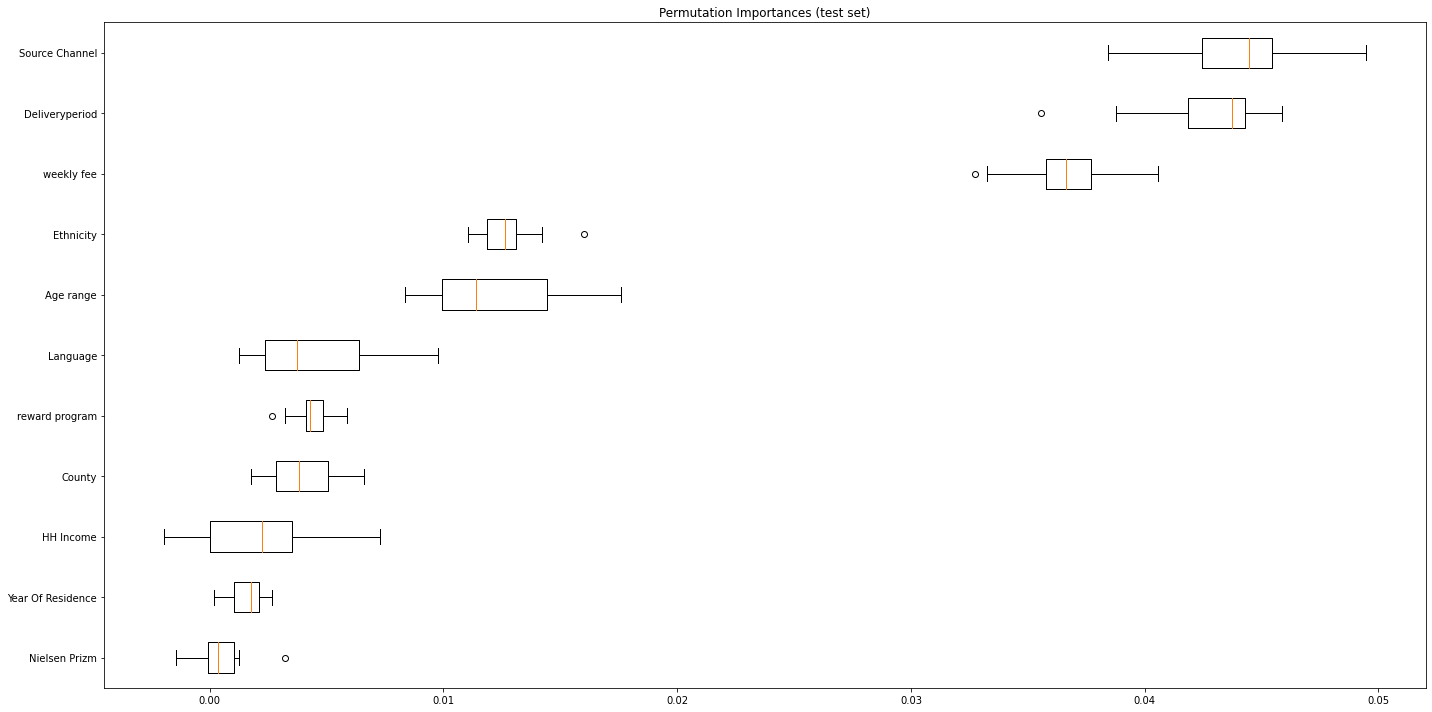



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.1s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.1s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.5s remaining:    3.3s
[

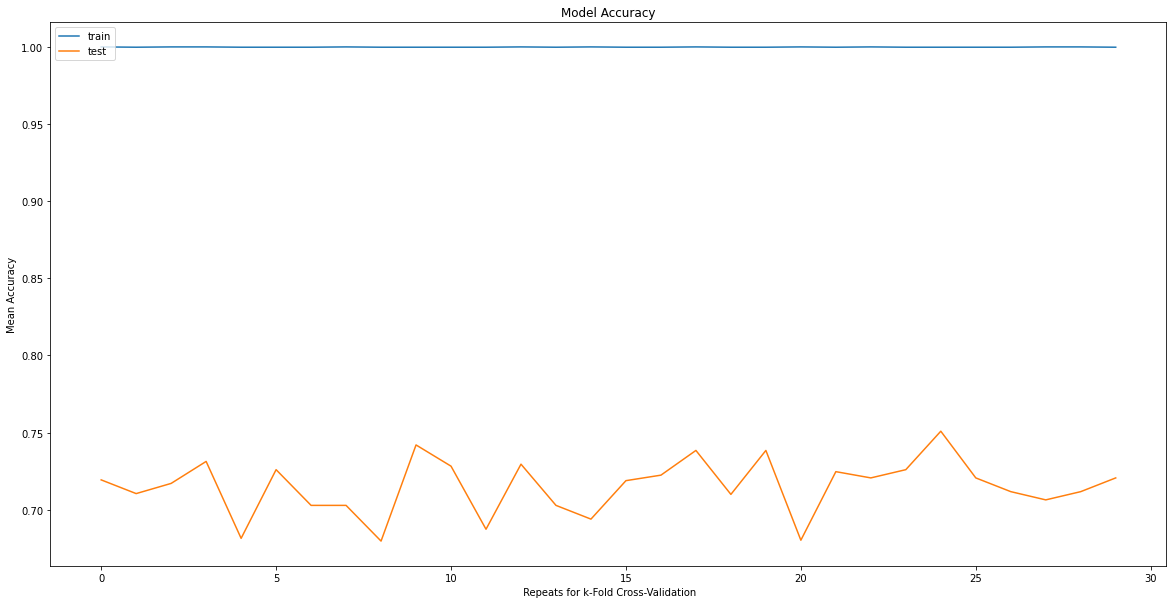

DecisionTreeClassifier
{'fit_time': array([0.36204553, 0.34904718, 0.3530488 , 0.35704708, 0.34804749,
       0.35904717, 0.35704517, 0.35904694, 0.34304762, 0.3400476 ,
       0.34505367, 0.33404899, 0.35700059, 0.32400465, 0.38699675,
       0.3689971 , 0.3659966 , 0.36499691, 0.36600304, 0.36899948,
       0.37499785, 0.35999775, 0.36799765, 0.34400129, 0.24900293,
       0.20200133, 0.17499542, 0.18399715, 0.17099786, 0.20199776]), 'score_time': array([0.01200175, 0.01100016, 0.01099944, 0.0150032 , 0.01200247,
       0.01300001, 0.01200294, 0.01100111, 0.01400113, 0.01099801,
       0.01500082, 0.01499796, 0.01099753, 0.01299763, 0.01100349,
       0.01100111, 0.01100111, 0.01100183, 0.01199913, 0.01100135,
       0.02100086, 0.01200199, 0.01700091, 0.01700068, 0.01199841,
       0.01000023, 0.0070014 , 0.00700045, 0.00699925, 0.00799942]), 'test_acc': array([0.71936057, 0.71047957, 0.71708185, 0.73131673, 0.68149466,
       0.72597865, 0.70284698, 0.70284698, 0.6797153 , 0.741992

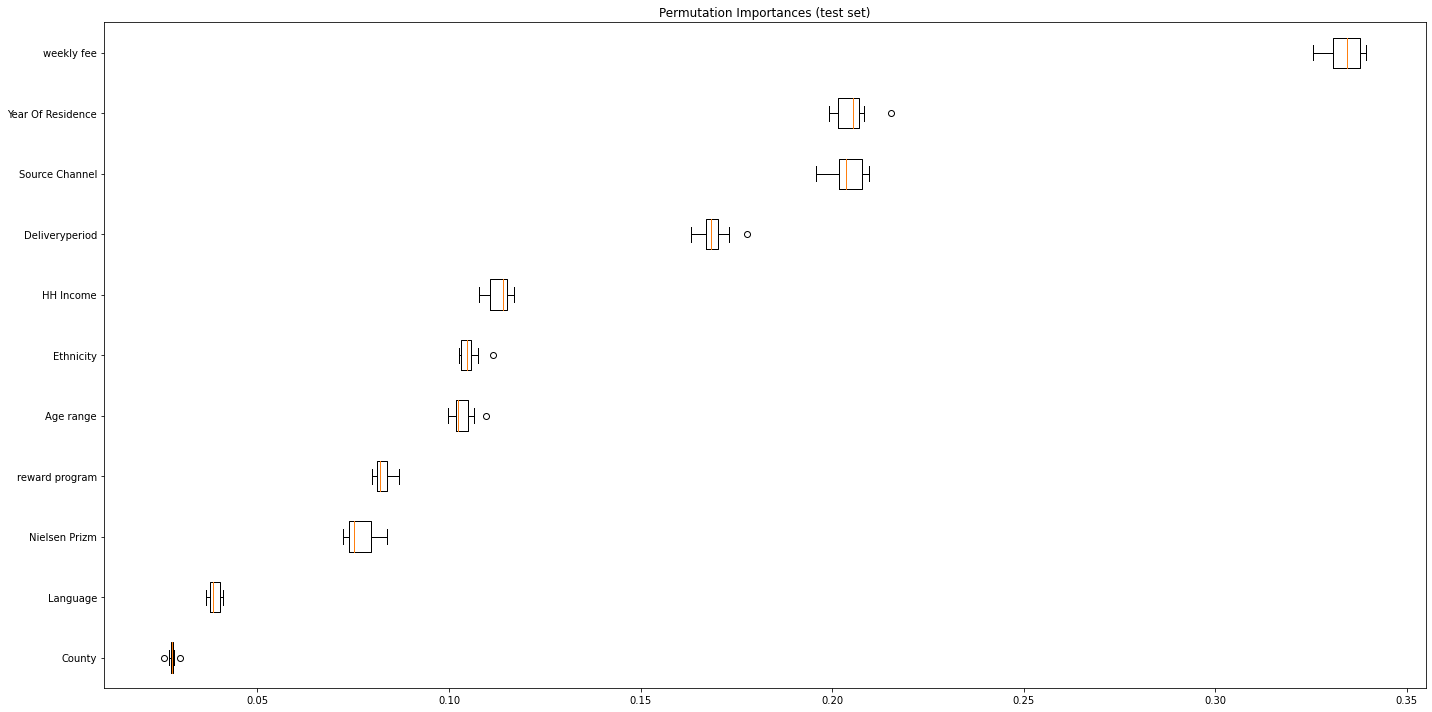



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    2.3s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    2.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    2.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    2.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    2.8s remaining:    3.7s
[

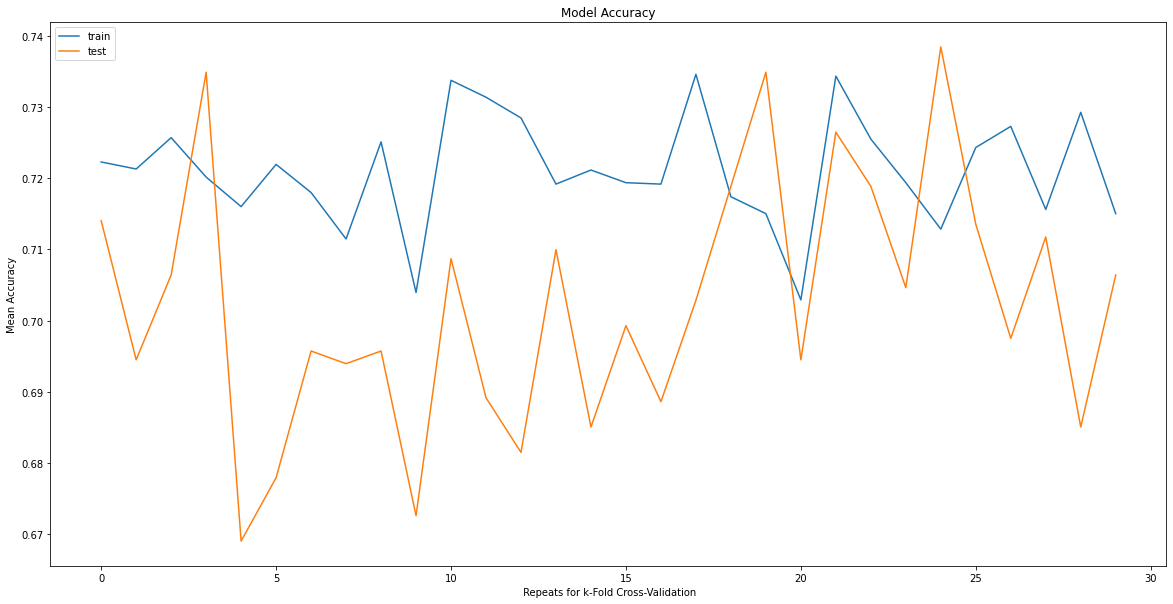

SGDClassifier
{'fit_time': array([0.61902595, 0.50802398, 0.62502623, 0.5810256 , 0.45502543,
       0.71802807, 0.66802621, 0.44702435, 0.43302941, 0.43902922,
       0.63902473, 0.53402686, 0.50899625, 0.51099944, 0.56603289,
       0.64403319, 0.57403278, 0.69603205, 0.55803323, 0.51203442,
       0.52903247, 0.59903359, 0.37403464, 0.46503282, 0.3900311 ,
       0.39999843, 0.47499847, 0.41599894, 0.33699822, 0.32599854]), 'score_time': array([0.01600003, 0.01100087, 0.01199913, 0.01200199, 0.01100087,
       0.01300001, 0.01300025, 0.01000118, 0.01000142, 0.0170002 ,
       0.01299977, 0.0110023 , 0.01100159, 0.01099968, 0.01099968,
       0.01100063, 0.01200056, 0.00905991, 0.01299953, 0.01199937,
       0.01299953, 0.01100039, 0.01199985, 0.01399899, 0.00800037,
       0.01000047, 0.0079999 , 0.00700045, 0.00800133, 0.00699997]), 'test_acc': array([0.71403197, 0.69449378, 0.70640569, 0.73487544, 0.66903915,
       0.67793594, 0.69572954, 0.69395018, 0.69572954, 0.67259786,
     

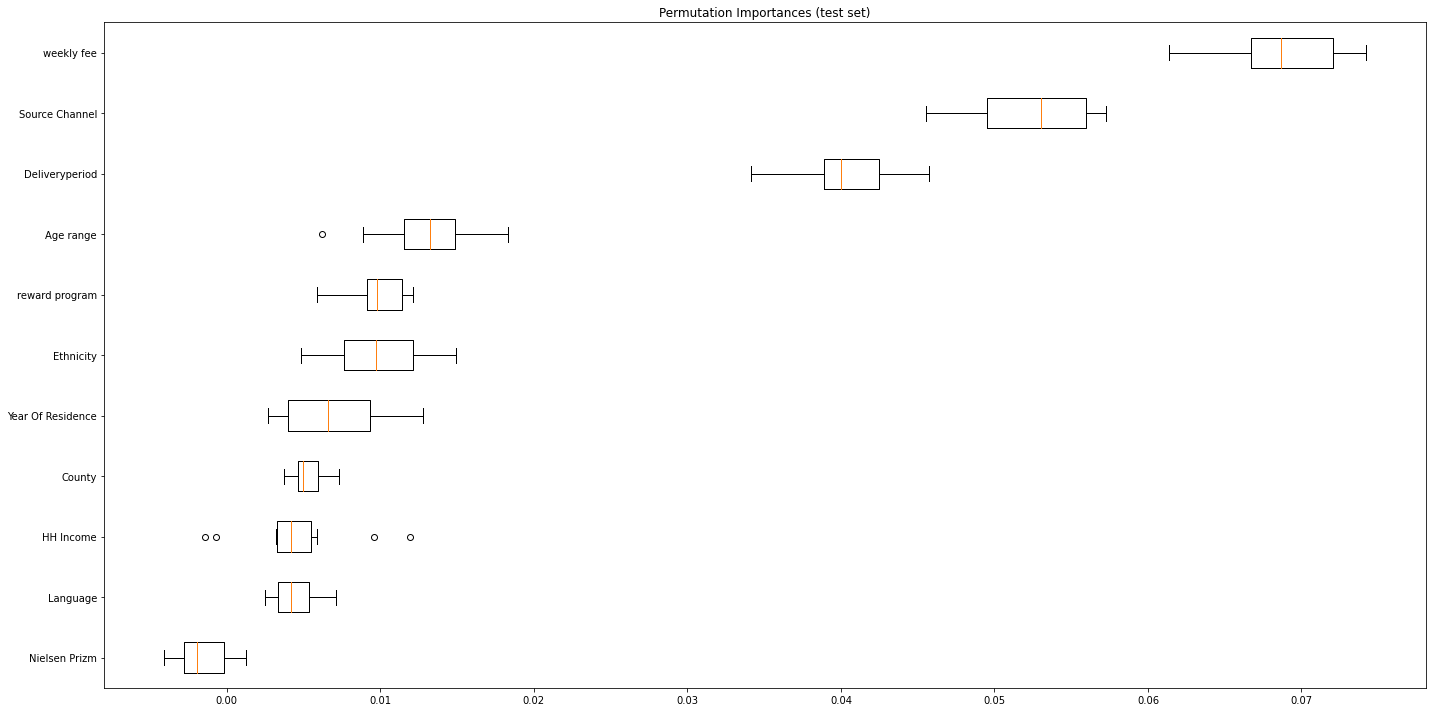



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    3.6s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    3.6s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    3.6s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    3.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:    5.3s remaining:    7.0s
[

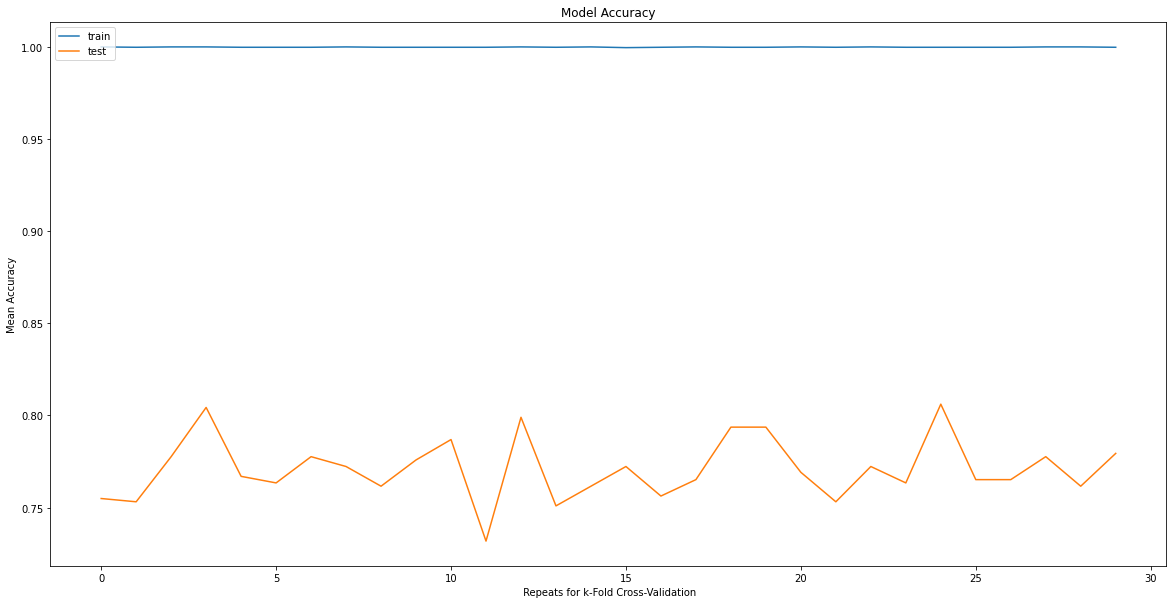

RandomForestClassifier
{'fit_time': array([1.54100847, 1.53000617, 1.49899721, 1.59999824, 1.54200792,
       1.53699827, 1.49099994, 1.53199768, 1.50300384, 1.55200553,
       1.55100298, 1.5010078 , 1.51200175, 1.48800611, 1.54700255,
       1.53300548, 1.54600811, 1.49600029, 1.55900407, 1.5600071 ,
       1.5340004 , 1.54300237, 1.56500506, 1.52700043, 1.0059967 ,
       0.94499946, 0.96799636, 0.99199653, 0.91499734, 0.85599566]), 'score_time': array([0.04199719, 0.04499817, 0.04600263, 0.04899788, 0.04399395,
       0.04500341, 0.04300308, 0.04800296, 0.04200244, 0.0449934 ,
       0.03999496, 0.04299569, 0.04299641, 0.04199553, 0.04400086,
       0.04799438, 0.04799652, 0.04200172, 0.04499817, 0.04399681,
       0.0449996 , 0.04299855, 0.04899812, 0.04599905, 0.02499962,
       0.02599859, 0.03200102, 0.03000093, 0.02800131, 0.02800083]), 'test_acc': array([0.75488455, 0.75310835, 0.77758007, 0.80427046, 0.76690391,
       0.7633452 , 0.77758007, 0.77224199, 0.76156584, 0.775800

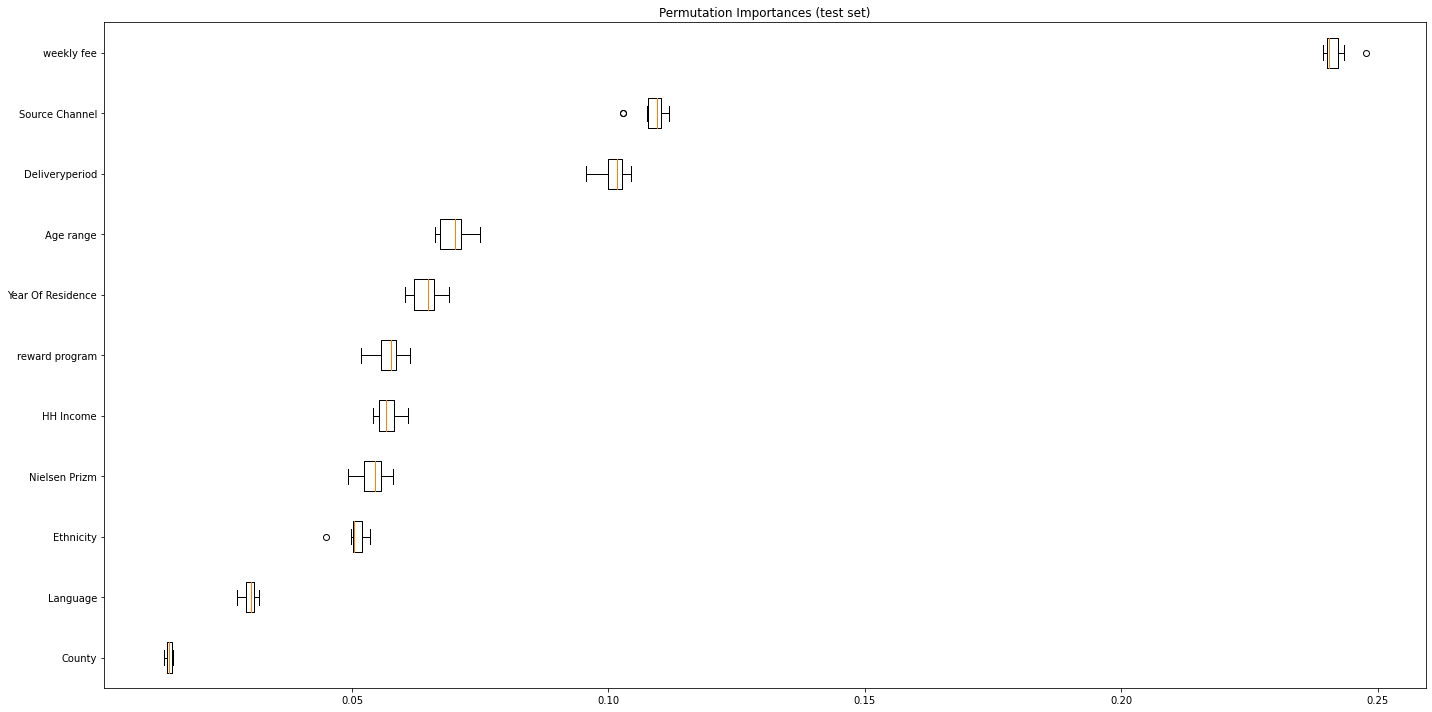



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:   24.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:   24.8s remaining:   57.9s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:   24.8s remaining:   49.7s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:   24.8s remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:   25.0s remaining:   37.5s
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed:   46.5s remaining:  1.0min
[

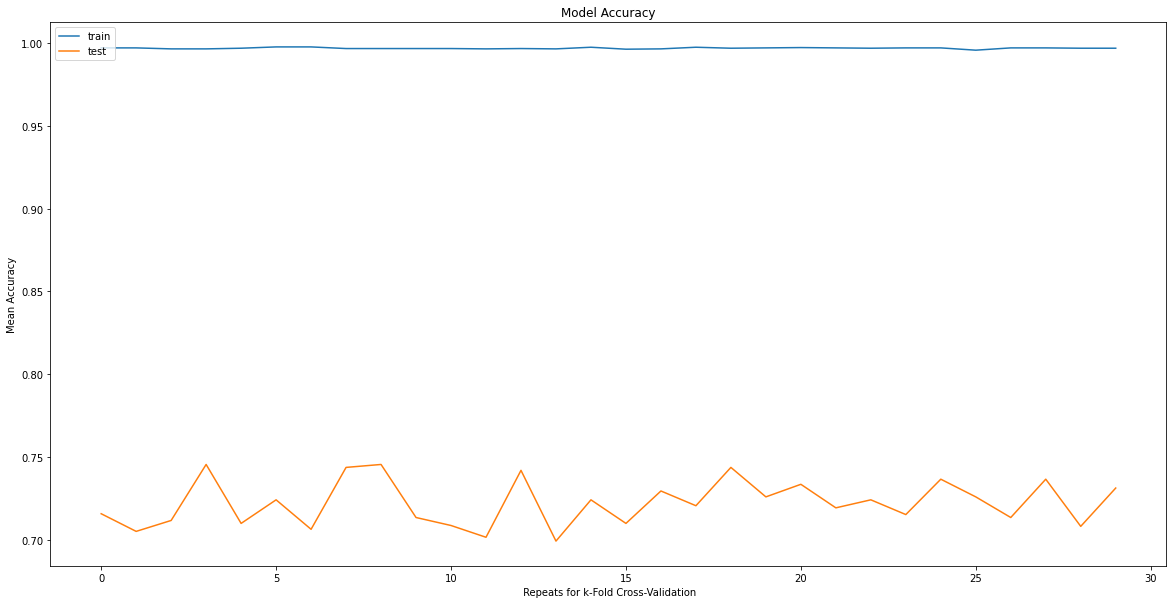

MLPClassifier
{'fit_time': array([22.37416101, 23.20369625, 22.61715627, 22.21016002, 22.8016963 ,
       22.62715483, 22.37516522, 22.33216357, 23.0226984 , 23.01569629,
       22.9096961 , 22.93270159, 22.23094034, 22.52893138, 22.35391903,
       22.80294204, 22.84839606, 22.54239678, 22.63438892, 22.7834034 ,
       23.21039486, 23.07638836, 22.93839645, 22.87739491,  9.11171627,
        9.04471231,  8.88772559,  8.98673964,  8.7497077 ,  8.63271308]), 'score_time': array([0.02700019, 0.02199984, 0.02300334, 0.02800059, 0.02000332,
       0.02300358, 0.02300406, 0.03000617, 0.02200389, 0.02100396,
       0.02299857, 0.02300358, 0.02899027, 0.02700543, 0.02400732,
       0.023983  , 0.02199936, 0.02600145, 0.02300382, 0.02499771,
       0.01699972, 0.023     , 0.02300286, 0.01999784, 0.01199675,
       0.00900102, 0.00899839, 0.00797415, 0.00799894, 0.0079999 ]), 'test_acc': array([0.71580817, 0.70515098, 0.71174377, 0.7455516 , 0.70996441,
       0.72419929, 0.70640569, 0.74377224,

c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


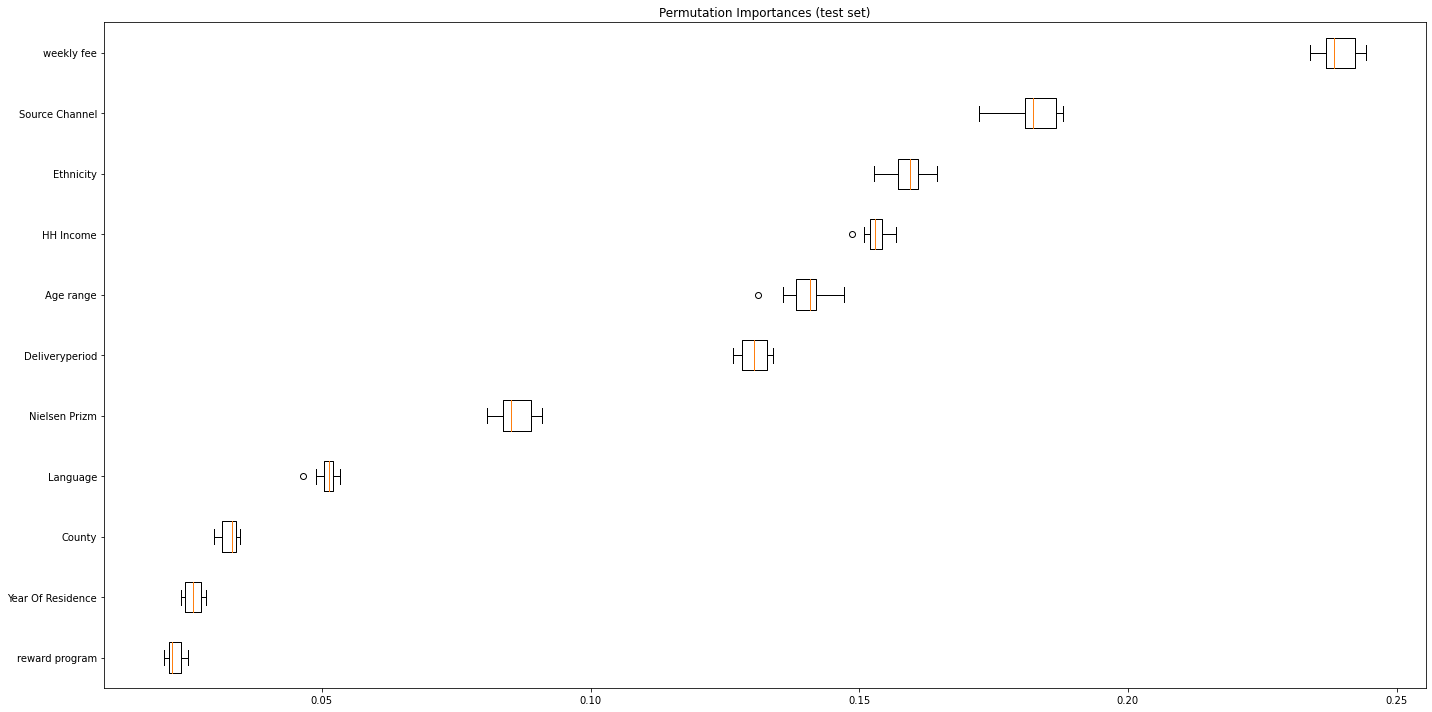

In [34]:
scores_3 = dict()
runAll(X_boxcox, scores_3)

Change from scores 1 to scores 2


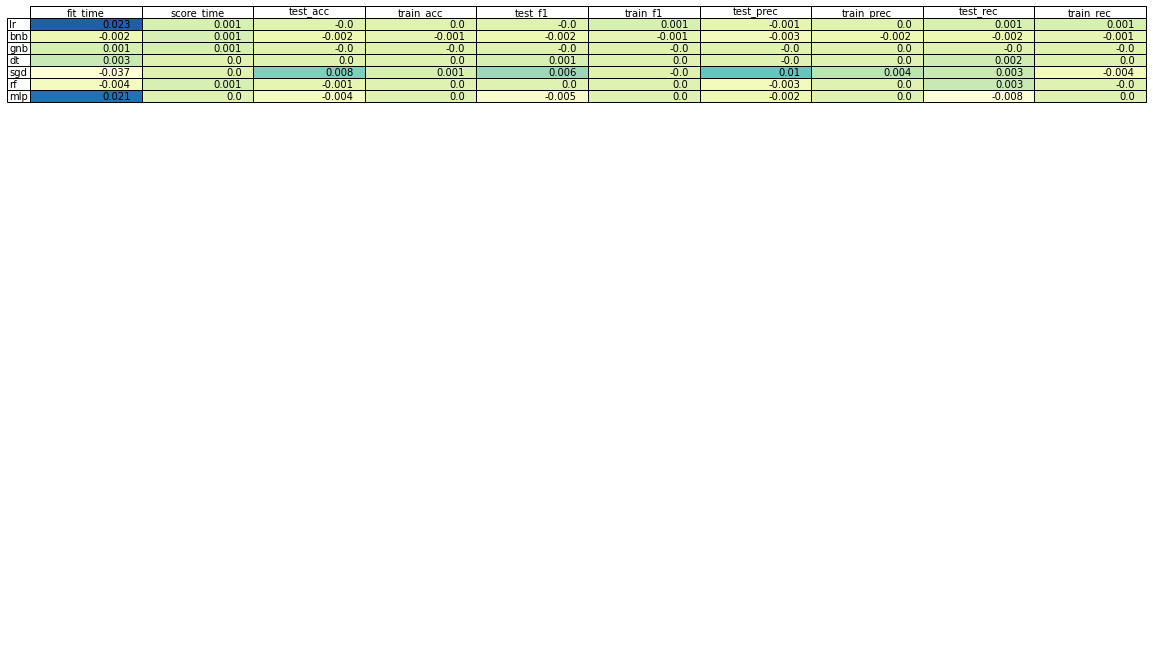

In [35]:
showChange(scores_2, scores_3)

Since this change has no significant effect on the accuracy of the different models but instead increases fit time for the MLP model, we will not implement it.

We are now ready for part-B, for this part, we will select the Logistic Regression, Random Forest and MLP Neural Network models for further fine-tuning. They are selected due to their performance metrics. The Decision Tree model is not selected since the Random Forest is already an ensemble of it. 

# Part B – Fine-tune the system

In [36]:
# Gan - LR
# JS - RF
# John - MLP + ensemble

Fine tuning

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


def fine_tuning(X, model, grid):

    full_pipeline = Pipeline([
            ('encode','passthrough'),
            ('scale', StandardScaler()),
            ('pca', 'passthrough'),
            ('model', model)
    ])

    cv = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
    scoring = {'acc': 'accuracy',
               'f1': 'f1',
               'prec': 'precision',
               'rec': 'recall'}
    
    print(type(model).__name__)

        # Random search of parameters, using 3 fold cross validation, 
        # search across 100 different combinations, and use all available cores
    grid_search = RandomizedSearchCV(estimator = full_pipeline, param_distributions = grid, n_iter = 200, cv = cv, verbose=100, random_state=42, n_jobs = -1, scoring=scoring, refit='acc')

    grid_result=grid_search.fit(X, y)
    
    # best params
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    return grid_result



## Logistic Regression

We will try different column transformations and dimensionality reduction techniques, in addition to the different model hyperparameters.

The below function will shows the best parameters after fine tuning

In [86]:
%%notify
from sklearn.decomposition import PCA

numeric = df_og2.select_dtypes(include=['int64']).columns.tolist()
multi_label_cat = ['HH Income', 'Age range', 'weekly fee']
onehot_cat = ['County','Deliveryperiod','Ethnicity','Language','Nielsen Prizm', 'Source Channel']

HH = df_og2['HH Income'].unique().tolist()
AR = df_og2['Age range'].unique().tolist()
WF = df_og2['weekly fee'].unique().tolist()
HH.sort()
HH.insert(0,HH.pop())
AR.sort()
WF.sort()
WF.append(WF.pop(5))
HH_map = {i:j for i,j in zip(HH,[i for i in range(len(HH))])}
AR_map = {i:j for i,j in zip(AR,[i for i in range(len(AR))])}
WF_map = {i:j for i,j in zip(WF,[i for i in range(len(WF))])}
col_map = [{'col': 'HH Income', 'mapping': HH_map}, {'col': 'Age range', 'mapping': AR_map}, 
                                                    {'col': 'weekly fee', 'mapping': WF_map}]
encode_pipeline_1 = ColumnTransformer([
        ('multi_label_cat', ordinal.OrdinalEncoder(mapping=col_map), multi_label_cat),
        ('onehot_cat', OneHotEncoder(handle_unknown='ignore'), onehot_cat),
], remainder = 'passthrough', sparse_threshold = 0)

onehot_cat = X.select_dtypes(exclude=['int64']).columns.tolist()
encode_pipeline_2 = ColumnTransformer([
        ('onehot_cat', OneHotEncoder(handle_unknown='ignore'), onehot_cat),
], remainder = 'passthrough', sparse_threshold = 0)

# define grid search
grid = {'encode':[encode_pipeline_1,encode_pipeline_2],
        'pca':['passthrough',PCA('mle'),PCA(10)],
        'model__solver':['saga'],
        'model__penalty':['elasticnet'],
        'model__l1_ratio':np.linspace(0,1,3),
        'model__C':np.linspace(0.01,100,5)
}
grid_lr1 = fine_tuning(X,LogisticRegression(),grid)


LogisticRegression
Fitting 3 folds for each of 90 candidates, totalling 270 fits


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 90 is smaller than n_iter=200. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Accuracy: 0.728566 using {'pca': 'passthrough', 'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 0.5, 'model__C': 0.01, 'encode': ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('onehot_cat',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HH Income', 'Ethnicity', 'Year Of Residence',
                                  'Age range', 'Language', 'County',
                                  'weekly fee', 'Deliveryperiod',
                                  'Nielsen Prizm', 'Source Channel'])])}


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


<IPython.core.display.Javascript object>

In [83]:
#TODO:make tight
def plot_grid_search(results_df, x_param, name_param_1, plot_param=False, name_param_2=False):
    # Get Test Scores Mean and std for each grid search
    if plot_param:
        scores_mean = dict()
        for i in results_df[plot_param].unique():
            scores_mean[i] = results_df.loc[results_df[plot_param] == i].groupby(x_param).mean()['mean_test_acc'].values
    else:
        scores_mean = results_df.groupby(x_param).mean()['mean_test_acc'].values
    # Plot Grid search scores
    fig, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    if plot_param:
        for key, value in scores_mean.items():
            ax.plot(results_df[x_param].unique(), value, '-o', label= name_param_2 + ': ' + str(key))
            ax.legend(loc="best", fontsize=15)
    else:
        ax.plot(results_df[x_param].unique(), scores_mean,'-o' )
        
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Accuracy', fontsize=16)
    ax.grid('on')


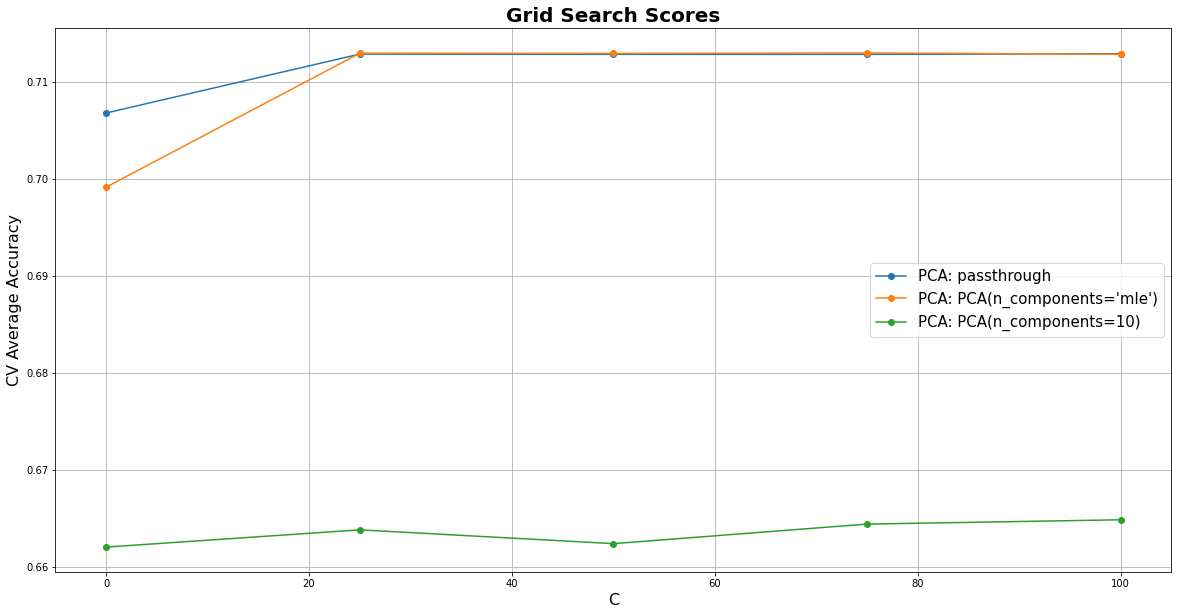

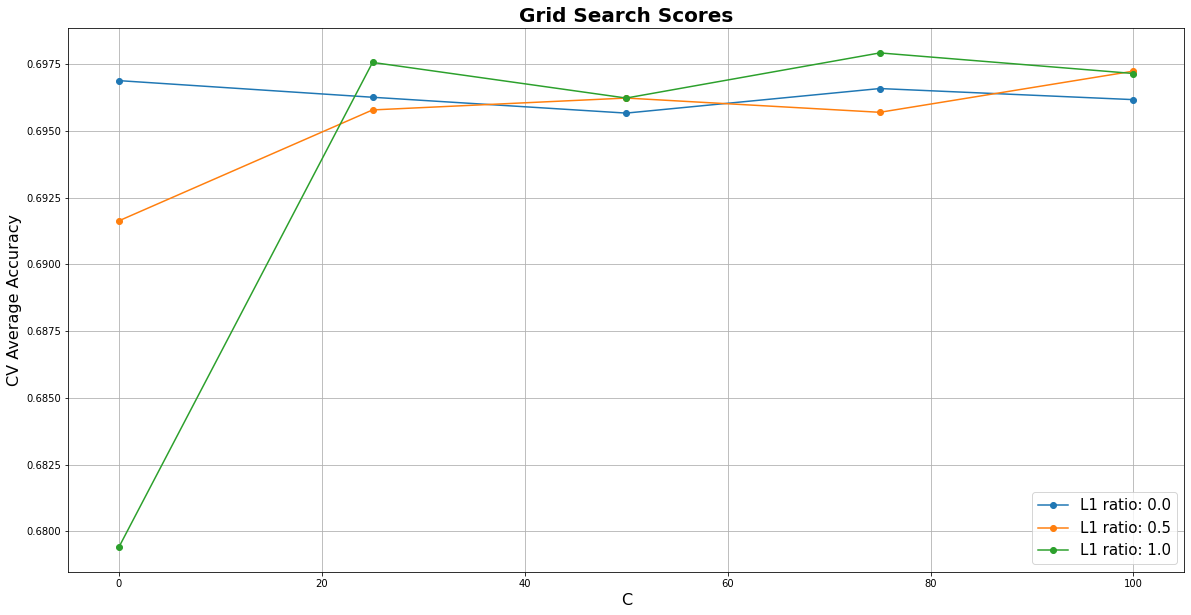

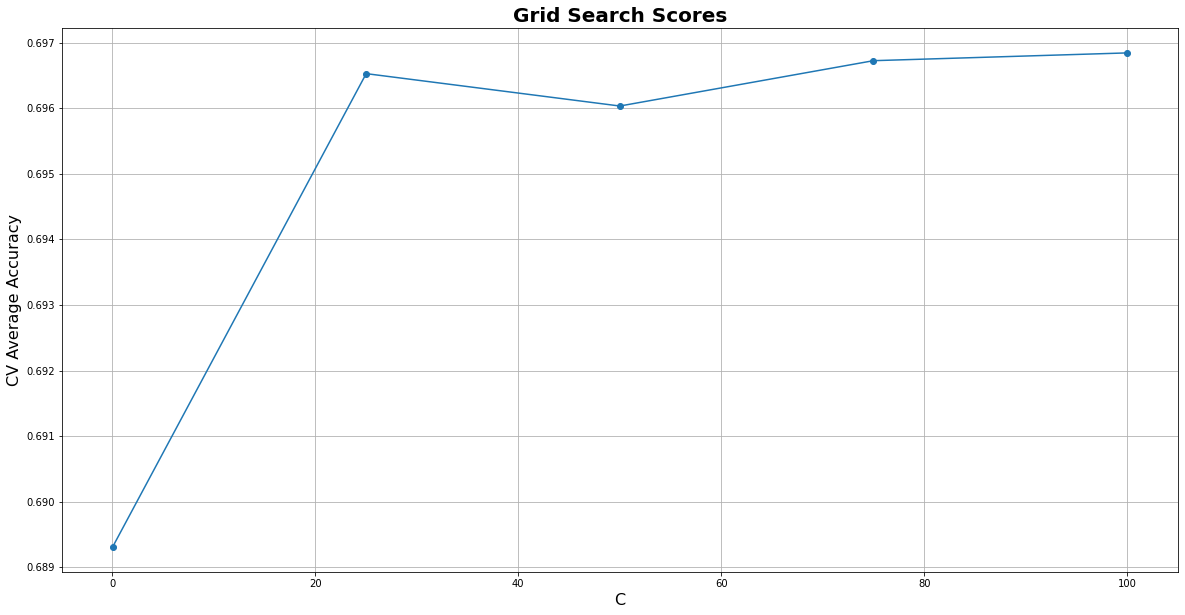

In [84]:
plot_grid_search(pd.DataFrame.from_dict(grid_lr.cv_results_), 'param_model__C', 'C', 'param_pca', 'PCA')
plot_grid_search(pd.DataFrame.from_dict(grid_lr.cv_results_), 'param_model__C', 'C', 'param_model__l1_ratio', 'L1 ratio')
plot_grid_search(pd.DataFrame.from_dict(grid_lr.cv_results_), 'param_model__C', 'C')

Based on the RandomizedSearchCV, we are able to obtain the best parameters for logistic regression model

Now we reduce the C values to around the best C values that we obtained above, in order to determine is there any improvement in term of accuracy

In [105]:
grid = {'encode':[encode_pipeline_1,encode_pipeline_2],
        'pca':['passthrough',PCA('mle'),PCA(10)],
        'model__solver':['saga'],
        'model__penalty':['elasticnet'],
        'model__l1_ratio':np.linspace(0,1,3),
        'model__C':np.linspace(0.05,1,5)
}
grid_lr2 = fine_tuning(X,LogisticRegression(),grid)

LogisticRegression
Fitting 3 folds for each of 90 candidates, totalling 270 fits


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 90 is smaller than n_iter=200. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Accuracy: 0.737104 using {'pca': 'passthrough', 'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 1.0, 'model__C': 0.05, 'encode': ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('onehot_cat',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HH Income', 'Ethnicity', 'Year Of Residence',
                                  'Age range', 'Language', 'County',
                                  'weekly fee', 'Deliveryperiod',
                                  'Nielsen Prizm', 'Source Channel'])])}


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Since the accuracy of the model is increased, we further tune the C values to lower and equal to the previous best C value. To determine is there any better accuracy when C value is decreasing

In [106]:
grid = {'encode':[encode_pipeline_1,encode_pipeline_2],
        'pca':['passthrough',PCA('mle'),PCA(10)],
        'model__solver':['saga'],
        'model__penalty':['elasticnet'],
        'model__l1_ratio':np.linspace(0,1,3),
        'model__C':np.linspace(0.001,0.05,5)
}
grid_lr3 = fine_tuning(X,LogisticRegression(),grid)

LogisticRegression
Fitting 3 folds for each of 90 candidates, totalling 270 fits


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 90 is smaller than n_iter=200. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Accuracy: 0.737104 using {'pca': 'passthrough', 'model__solver': 'saga', 'model__penalty': 'elasticnet', 'model__l1_ratio': 0.5, 'model__C': 0.025500000000000002, 'encode': ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('onehot_cat',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HH Income', 'Ethnicity', 'Year Of Residence',
                                  'Age range', 'Language', 'County',
                                  'weekly fee', 'Deliveryperiod',
                                  'Nielsen Prizm', 'Source Channel'])])}


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


There is no changes in term of the accuracy that we obtained, so this is the best parameters for logistic regression after tuning

{'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.5, 'C': 0.025500000000000002}
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    4.5s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:    4.5s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:    4.5s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    4.5s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  12 out of  30 | elapsed:    4.6s remaining:    6

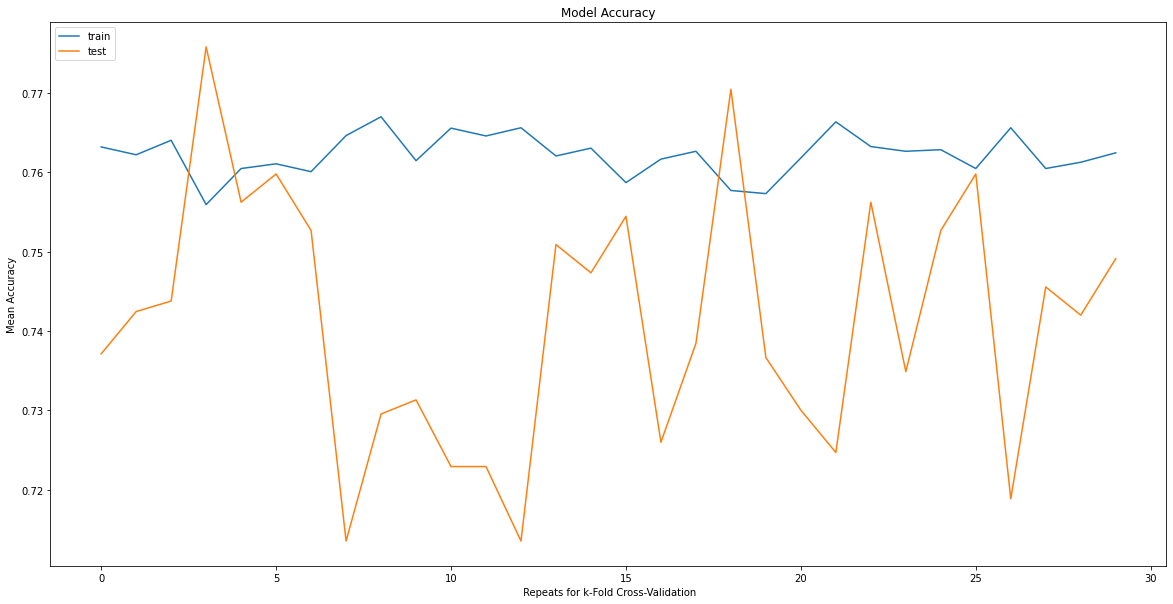

LogisticRegression
{'fit_time': array([2.66401839, 2.67653537, 2.72201753, 2.68501735, 2.65201616,
       2.68802691, 2.7030189 , 2.65701389, 2.75101995, 2.72201157,
       2.70301247, 2.74701786, 2.70799518, 2.6769948 , 2.69099689,
       2.72799563, 2.74299812, 2.70999479, 2.65699768, 2.69299936,
       2.74800467, 2.6549983 , 2.74199915, 2.71700096, 1.772609  ,
       1.69261098, 1.68560672, 1.62960601, 1.65561128, 1.73660779]), 'score_time': array([0.01100087, 0.01000047, 0.01500177, 0.0120008 , 0.01100087,
       0.01099992, 0.01199913, 0.01100135, 0.01399994, 0.01500273,
       0.01300001, 0.0170002 , 0.00999951, 0.01000094, 0.00999951,
       0.01200223, 0.01699901, 0.0100019 , 0.01199985, 0.01499939,
       0.01499677, 0.01599979, 0.01499963, 0.01299906, 0.00700068,
       0.00800014, 0.00800037, 0.00900245, 0.00799775, 0.00700021]), 'test_acc': array([0.73712256, 0.74245115, 0.74377224, 0.77580071, 0.75622776,
       0.75978648, 0.75266904, 0.71352313, 0.72953737, 0.73131673,


c:\users\septe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


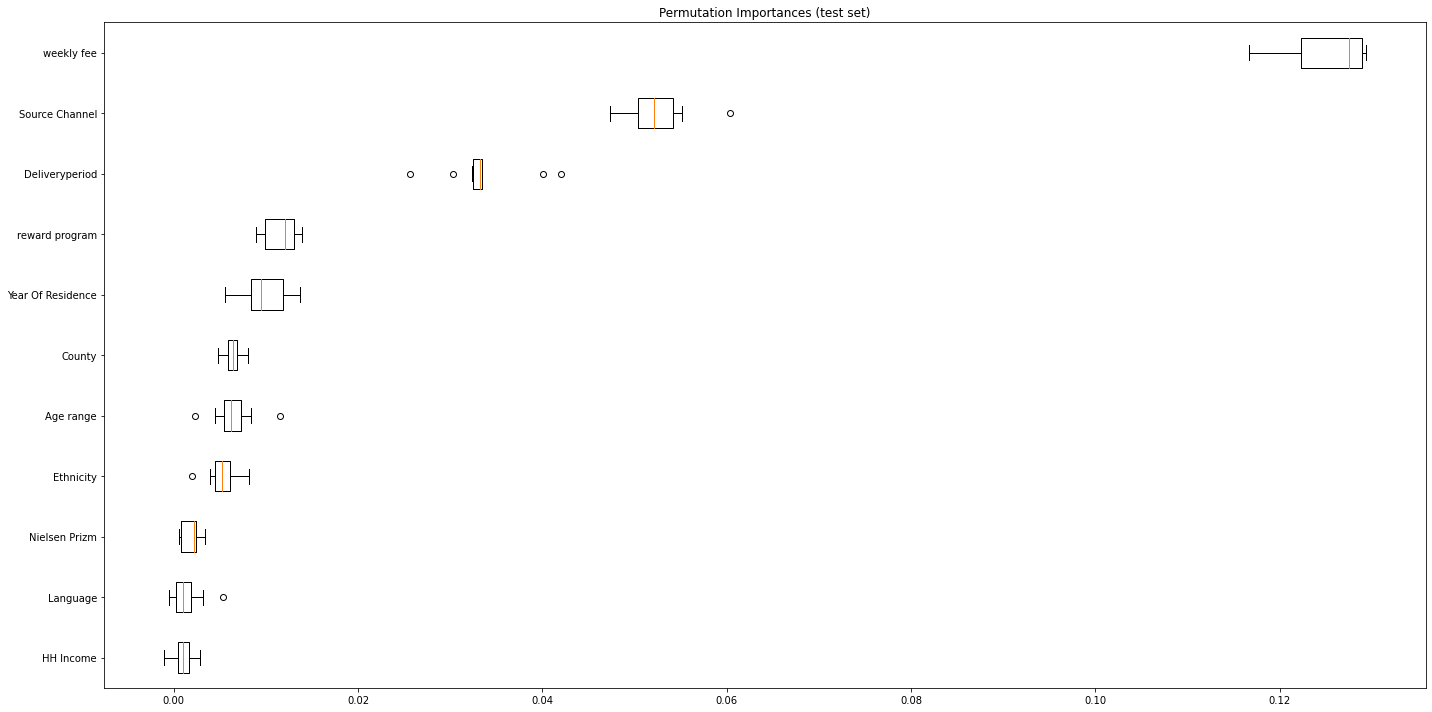

In [108]:
# remove the prefix of model__
best_params={}
for x in grid_lr3.best_params_:
    if x.startswith('model__'):
        x2=x.replace('model__',"")
        best_params[x2]=grid_lr3.best_params_[x]

print(best_params)
# pass the best params
model_lr = LogisticRegression()
model_lr.set_params(**best_params)
    
scores_4=getScores(X,model_lr)

Fit_time          : The time taken to fit into the logistic regression.

Score_time        : The time taken for scoring the estimator on the test set for each cv split. 

The train accuracy: The accuracy of a model on examples it was constructed on.

The test accuracy : The accuracy of a model on examples it hasn't seen. 

(Sames theory of test and train applies to f1, precision and recall values.)

Based on the graph, the mean test accuracy is lower than mean train accuracy which is valid, since the logistic regression model is optimized for the latter.

There is no overfitting issue since the difference of mean test and mean train accuracy is very close to each other. Roughly 3% difference only.

The different of mean test and mean train accuracy is small, which is good since we want to generalise our model to unseen data

Change from scores 1 to scores 2


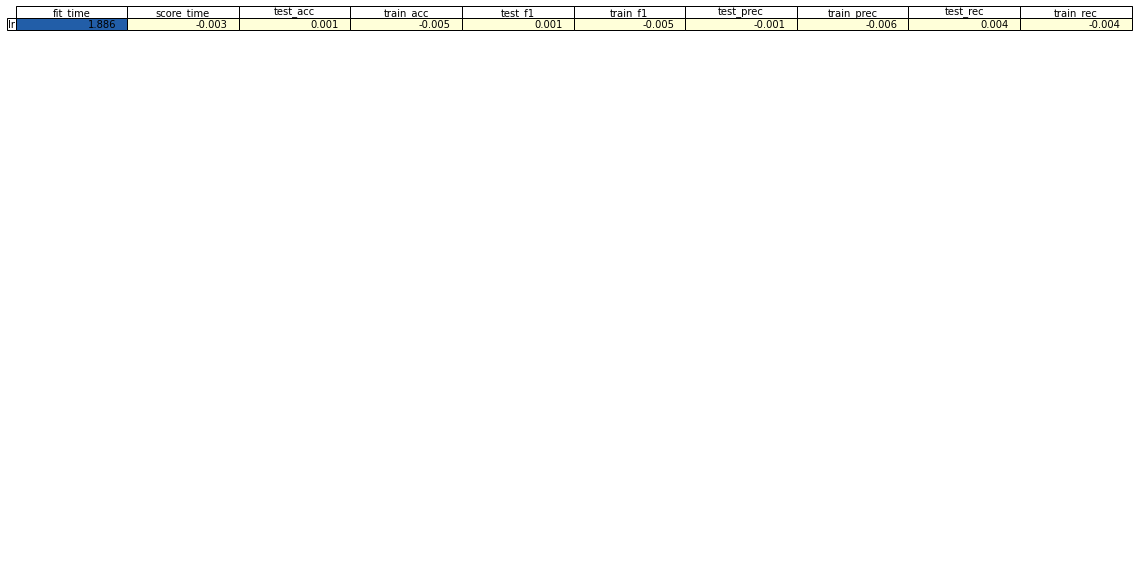

In [111]:
showChange(scores_3,scores_4, 'lr')

Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}

scores_5=fine_tuning(X,RandomForestClassifier(),random_grid)

After executing RandomizedSearchCV by passing in Random Hyperparameter Grid, the best parameters are using this combination {'model__n_estimators': 1800, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 30, 'model__bootstrap': False} which gives an accuracy of 0.764141. The value of max_features is 'sqrt' which indicates that the number of features allowed to make the best split is equal to the square root of total number of features in the dataset. Since there are 11 features in the dataset, the two nearest numbers to apply with square root that turns into an integer number is 9 and 16 which their square root values result in 3 and 4. Thus, the value of max_features in the next tuning step is assigned with 3 to 4.

In [ ]:
n_estimators = [1200, 1900, 2000, 2100]
max_features = [3, 4]
max_depth = [40, 50, 60, 70]
min_samples_split = [8, 10, 12]
min_samples_leaf = [1, 2, 3]
bootstrap = [False]

random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}

scores_6=fine_tuning(X,RandomForestClassifier(),random_grid,True)

After the second fine tuning, the best accuracy of all the models is 0.752046 in which lower than the previous best accuracy(0.764141) with a value of 0.012095. As the best parameter value for min_samples_leaf have been proved to be 1 from two rounds of fine tuning above, we are going to stick the value with it for the next round. The value of max_features will be assigned with 4 as stated from the resulting parameter list above.

In [ ]:
n_estimators = [1600, 1700, 1800, 1850]
max_features = [4]
max_depth = [30, 35, 40, 45, 50]
min_samples_split = [10, 12, 14]
min_samples_leaf = [1]
bootstrap = [False]

random_grid = {'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}

scores_7=fine_tuning(X,RandomForestClassifier(),random_grid,True)

After the third fine tuning, the best accuracy slightly increases from 0.752046 to 0.752757. However, the value is still lower than the best accuracy we get from the first fine tuning. As a result, the Random Forest Classifier using the best parameters of {'model__n_estimators': 1800, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 30, 'model__bootstrap': False} from the first fine tuning will be the best model since it gives the best accuracy of 0.764141.